# 1.Loading the data

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Used for Confusion Matrix
from sklearn import metrics
import seaborn as sn
import pandoc

# Used for Loading MNIST
from struct import unpack
import datetime
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [3]:
def loadMnist(imagefile, labelfile):
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')
    images.read(4)
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]
    images.close()
    labels.close()
    return (x, y)

In [4]:
TrainImg, TrainLb = loadMnist('data/train-images-idx3-ubyte'
                                 , 'data/train-labels-idx1-ubyte')
TestImg, TestLb = loadMnist('data/t10k-images-idx3-ubyte'
                               , 'data/t10k-labels-idx1-ubyte')

In [5]:
print("Train-imges's shape is {}".format(TrainImg.shape))
print("Train_labels's shape is {}".format(TrainLb.shape))
print("Test_imges's shape is {}".format(TestImg.shape))
print("Test_imges's shape is {}".format(TestLb.shape))

Train-imges's shape is (60000, 784)
Train_labels's shape is (60000,)
Test_imges's shape is (10000, 784)
Test_imges's shape is (10000,)


In [6]:
TrainImg2 = TrainImg.reshape(60000,28,28)
TestImg2 = TestImg.reshape(10000,28,28)

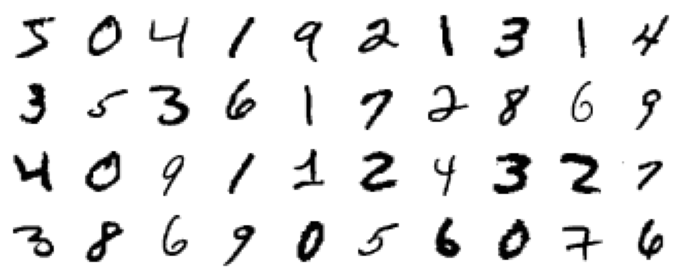

In [10]:
def plotExamples(data, n_rows=4, n_cols=10):
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):      
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(data[index], cmap="binary")
            plt.axis('off')            
    plt.show()

plotExamples(TrainImg2)

# 2.Pre-processing

## 2.1 Standard

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
preStand = StandardScaler()
preStand.fit(TrainImg)
TrainImgSta = preStand.transform(TrainImg)
TestImgSta = preStand.transform(TestImg)

In [19]:
TrainImgSta2 = TrainImgSta.reshape(60000,28,28)
TestImgSta2 = TestImgSta.reshape(10000,28,28)

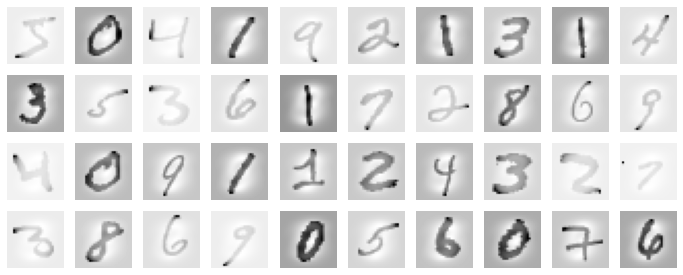

In [20]:
plotExamples(TrainImgSta2)

## 2.2 Normalized

In [21]:
TrainImgNor = TrainImg/255
TestImgNor = TestImg/255
TrainImgNor2 = TrainImgNor.reshape(60000,28,28)
TestImgNor2 = TestImgNor.reshape(10000,28,28)

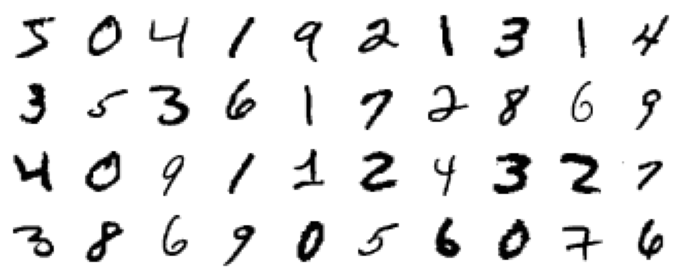

In [21]:
plotExamples(TrainImgNor2)

## 2.3 Cropping

In [22]:
 def dataCropping(CropData,Length):
    CropDataFinsh = np.empty([Length,20,20])
    for i in range(Length):
        Row = np.delete(CropData[i],[0,1,2,3,24,25,26,27],axis=0)
        Column = np.delete(Row,[0,1,2,3,24,25,26,27],axis=1)
        CropDataFinsh[i] = Column
    return CropDataFinsh

In [23]:
TrainImgCrop2 = dataCropping(TrainImg2,60000)
TestImgCrop2 = dataCropping(TestImg2,10000)
TrainImgCrop = TrainImgCrop2.reshape(60000,400)
TestImgCrop = TestImgCrop2.reshape(10000,400)

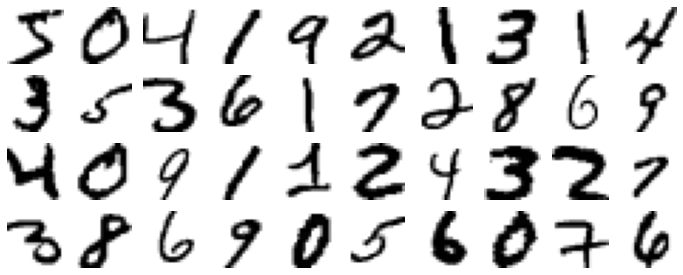

In [11]:
plotExamples(TrainImgCrop2)

# 3.Classifier

## 3.1 KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

### 3.1.1 Choosing the best Data Preprocessing Method for KNN

#### 3.1.1.1 Using Original Data

In [8]:
KNNOri = KNeighborsClassifier(n_neighbors=1)

In [9]:
starttime = datetime.datetime.now()
KNNOri.fit(TrainImg,TrainLb)
KNNOriScore = KNNOri.score(TestImg,TestLb)
print("the score of KNN(1) original data is {}".format(KNNOriScore))
endtime = datetime.datetime.now()
KNNTimeOri = endtime - starttime
print("the time of KNN(1) original data is {}".format(KNNTimeOri))

the score of KNN(1) original data is 0.9691
the time of KNN(1) original data is 0:00:13.149060


#### 3.1.1.2 Using Standard data

In [49]:
KNNSta = KNeighborsClassifier(n_neighbors=1)

In [50]:
starttime = datetime.datetime.now()
KNNSta.fit(TrainImgSta,TrainLb)
KNNStaScore = KNNSta.score(TestImgSta,TestLb)
print("the score of KNN(1) standard data is {}".format(KNNStaScore))
endtime = datetime.datetime.now()
KNNTimeSta = endtime - starttime
print("the time of KNN(1) standard data is {}".format(KNNTimeSta))

the score of KNN(1) standard data is 0.9434
the time of KNN(1) standard data is 0:00:10.116989


#### 3.1.1.3 Using Nor Data

In [15]:
KNNNor = KNeighborsClassifier(n_neighbors=1)

In [17]:
starttime = datetime.datetime.now()
KNNNor.fit(TrainImgNor,TrainLb)
KNNNorScore = KNNNor.score(TestImgNor,TestLb)
print("the score of KNN(1) Normalized data is {}".format(KNNNorScore))
endtime = datetime.datetime.now()
KNNTimeNor = endtime - starttime
print("the time of KNN(1) Normalized data is {}".format(KNNTimeNor))

the score of KNN(1) Normalized data is 0.9691
the time of KNN(1) Normalized data is 0:00:10.525661


#### 3.1.1.4 Using Cropping Data

In [25]:
KNNCrop = KNeighborsClassifier(n_neighbors=1)

In [27]:
starttime = datetime.datetime.now()
KNNCrop.fit(TrainImgCrop,TrainLb)
KNNCropScore = KNNCrop.score(TestImgCrop,TestLb)
print("the score of KNN(1) Cropping data is {}".format(KNNCropScore))
endtime = datetime.datetime.now()
KNNTimeCrop = endtime - starttime
print("the time of KNN(1) Cropping data is {}".format(KNNTimeCrop))

the score of KNN(1) Cropping data is 0.968
the time of KNN(1) Cropping data is 0:00:07.754784


### 3.1.2 Choosing the best parameter for KNN

In [28]:
for i in (1,3,5,7,10):
    starttime = datetime.datetime.now()
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(TrainImg,TrainLb)
    KNNScore = KNN.score(TestImg,TestLb)
    endtime = datetime.datetime.now()
    print("the score of k-neighbors:{} is {},time is{}".format(i,KNNScore,(endtime-starttime)))

the score of k-neighbors:1 is 0.9691,time is0:00:10.906174
the score of k-neighbors:3 is 0.9705,time is0:00:11.800378
the score of k-neighbors:5 is 0.9688,time is0:00:14.537643
the score of k-neighbors:7 is 0.9694,time is0:00:14.889782
the score of k-neighbors:10 is 0.9665,time is0:00:16.444971


In [29]:
for i in (2,4,6):
    starttime = datetime.datetime.now()
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(TrainImg,TrainLb)
    KNNScore = KNN.score(TestImg,TestLb)
    endtime = datetime.datetime.now()
    print("the score of k-neighbors:{} is {},time is{}".format(i,KNNScore,(endtime-starttime)))

the score of k-neighbors:2 is 0.9627,time is0:00:10.863140
the score of k-neighbors:4 is 0.9682,time is0:00:14.238860
the score of k-neighbors:6 is 0.9677,time is0:00:14.957336


3!

In [90]:
#distance or uniform
starttime = datetime.datetime.now()
KNN = KNeighborsClassifier(n_neighbors=3,weights='distance')
KNN.fit(TrainImg,TrainLb)
KNNScore = KNN.score(TestImg,TestLb)
endtime = datetime.datetime.now()
print("the score of KNN weight = distance is {},time is{}".format(i,KNNScore,(endtime-starttime)))

the score of KNN weight = distance is 1.5,time is0.9717


### 3.1.3 Best KNN

In [91]:
starttime = datetime.datetime.now()
KNNBest = KNeighborsClassifier(n_neighbors=3,weights='distance')
KNNBest.fit(TrainImg,TrainLb)
KNNPre = KNNBest.predict(TestImg)
endtime = datetime.datetime.now()
print("the best KNN time is{}".format(endtime-starttime))

the best KNN time is0:00:12.232091


In [92]:
KNNAcc = accuracy_score(KNNPre,TestLb)
print("the best KNN's accuracy is {}".format(KNNAcc))
KNNRec = recall_score(KNNPre,TestLb,average='macro')
print("the best KNN's recall is {}".format(KNNRec))
KNNF1 = precision_score(KNNPre,TestLb,average='macro')
print("the best KNN's precision is {}".format(KNNF1))
KNNConMat = confusion_matrix(KNNPre,TestLb)
print(KNNConMat)

the best KNN's accuracy is 0.9717
the best KNN's recall is 0.9719031233123564
the best KNN's precision is 0.9713357268999042
[[ 974    0    9    0    0    4    4    0    7    3]
 [   1 1133    7    1    5    1    3   18    0    4]
 [   1    2  997    4    0    0    0    4    3    2]
 [   0    0    2  975    0   12    0    0   13    7]
 [   0    0    0    1  948    2    4    2    5    9]
 [   1    0    0   13    0  860    3    0   11    4]
 [   2    0    1    1    5    5  944    0    3    1]
 [   1    0   14    7    4    1    0  994    4    8]
 [   0    0    2    4    1    3    0    0  923    2]
 [   0    0    0    4   19    4    0   10    5  969]]


## 3.2 Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

### 3.2.1 Choosing the best Data Preprocessing Method for Logistic Regression

#### 3.2.1.1 Using Original Data

In [31]:
LROri = LogisticRegression(random_state=10)

In [35]:
starttime = datetime.datetime.now()
LROri.fit(TrainImg,TrainLb)
LROriScore = LROri.score(TestImg,TestLb)
print("the score of LR original data is {}".format(LROriScore))
endtime = datetime.datetime.now()
LRTimeOri = endtime - starttime
print("the time of LR original data is {}".format(LRTimeOri))

the score of LR original data is 0.9255
the time of LR original data is 0:00:11.211643


#### 3.2.1.2 Using Standard data

In [38]:
LRSta = LogisticRegression(random_state=10)

In [39]:
starttime = datetime.datetime.now()
LRSta.fit(TrainImgSta,TrainLb)
LRStaScore = LRSta.score(TestImgSta,TestLb)
print("the score of LR standard data is {}".format(LRStaScore))
endtime = datetime.datetime.now()
LRTimeSta = endtime - starttime
print("the time of LR standard data is {}".format(LRTimeSta))

the score of LR standard data is 0.9246
the time of LR standard data is 0:00:10.851691


#### 3.2.1.3 Using Nor Data

In [36]:
LRNor = LogisticRegression(random_state=10)

In [37]:
starttime = datetime.datetime.now()
LRNor.fit(TrainImgNor,TrainLb)
LRNorScore = LRNor.score(TestImgNor,TestLb)
print("the score of LR Normalized data is {}".format(LRNorScore))
endtime = datetime.datetime.now()
LRTimeNor = endtime - starttime
print("the time of LR Normalized data is {}".format(LRTimeNor))

the score of LR Normalized data is 0.9258
the time of LR Normalized data is 0:00:10.112671


#### 3.2.1.4 Using Cropping Data

In [41]:
LRCrop = LogisticRegression(random_state=10)

In [42]:
starttime = datetime.datetime.now()
LRCrop.fit(TrainImgCrop,TrainLb)
LRCropScore = LRCrop.score(TestImgCrop,TestLb)
print("the score of LR Cropping data is {}".format(LRCropScore))
endtime = datetime.datetime.now()
LRTimeCrop = endtime - starttime
print("the time of LR Cropping data is {}".format(LRTimeCrop))

the score of LR Cropping data is 0.9214
the time of LR Cropping data is 0:00:07.785597


### 3.2.2 Choosing the best parameter for Logistic Regression

In [44]:
for i in (0.5,0.8,1,1.2):
    starttime = datetime.datetime.now()
    LR = LogisticRegression(random_state=10,C=i)
    LR.fit(TrainImgNor,TrainLb)
    LRScore = LR.score(TestImgNor,TestLb)
    endtime = datetime.datetime.now()
    print("the score of C:{} is {},time is{}".format(i,LRScore,(endtime-starttime)))

the score of C:0.5 is 0.9256,time is0:00:10.292937
the score of C:0.8 is 0.9253,time is0:00:10.203652
the score of C:1 is 0.9258,time is0:00:10.287183
the score of C:1.2 is 0.9258,time is0:00:09.915459


In [46]:
for i in (1.1,1.3,1.5,1.7):
    starttime = datetime.datetime.now()
    LR = LogisticRegression(random_state=10,C=i)
    LR.fit(TrainImgNor,TrainLb)
    LRScore = LR.score(TestImgNor,TestLb)
    endtime = datetime.datetime.now()
    print("the score of C:{} is {},time is{}".format(i,LRScore,(endtime-starttime)))

the score of C:1.1 is 0.9255,time is0:00:11.261150
the score of C:1.3 is 0.9266,time is0:00:11.402877
the score of C:1.5 is 0.9258,time is0:00:10.635681
the score of C:1.7 is 0.9258,time is0:00:10.353089


In [47]:
for i in (1.4,1.6):
    starttime = datetime.datetime.now()
    LR = LogisticRegression(random_state=10,C=i)
    LR.fit(TrainImgNor,TrainLb)
    LRScore = LR.score(TestImgNor,TestLb)
    endtime = datetime.datetime.now()
    print("the score of C:{} is {},time is{}".format(i,LRScore,(endtime-starttime)))

the score of C:1.4 is 0.9254,time is0:00:10.412451
the score of C:1.6 is 0.9257,time is0:00:10.617580


1.3!

### 3.1.3 Best Logistic Regression

In [39]:
starttime = datetime.datetime.now()
LRBest = LogisticRegression(random_state=10,C=1.3)
LRBest.fit(TrainImgNor,TrainLb)
LRPre = LRBest.predict(TestImgNor)
endtime = datetime.datetime.now()
print("the best LR time is{}".format(endtime-starttime))

the best LR time is0:00:17.688514


D:\acaconda\envs\learning1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
LRAcc = accuracy_score(LRPre,TestLb)
print("the best LR's accuracy is {}".format(LRAcc))
LRRec = recall_score(LRPre,TestLb,average='macro')
print("the best LR's recall is {}".format(LRRec))
LRF1 = precision_score(LRPre,TestLb,average='macro')
print("the best LR's precision is {}".format(LRF1))
LRConMat = confusion_matrix(LRPre,TestLb)
print(LRConMat)

the best LR's accuracy is 0.9266
the best LR's recall is 0.9256907898588013
the best LR's precision is 0.9256075486117503
[[ 960    0    6    4    1   10    9    1    8    9]
 [   0 1111    7    1    1    2    3    8   10    8]
 [   0    5  932   20    7    3    8   25    8    1]
 [   2    1   13  912    3   30    2    4   21   10]
 [   1    0    8    1  913    7    7    7    6   23]
 [   7    2    4   23    0  785   15    1   26    6]
 [   5    3   14    4   10   15  911    0   12    0]
 [   4    2    6   11    6    5    2  952    7   19]
 [   1   11   38   27   10   30    1    3  863    6]
 [   0    0    4    7   31    5    0   27   13  927]]


# 3.3 MLP

In [34]:
import tensorflow as tf
from tensorflow import keras

### 3.3.1 Choosing the best Data Preprocessing Method for MLP

#### 3.3.1.1 Using Original Data

In [14]:
from sklearn.model_selection import train_test_split
TrainImg2Tr, TrainImg2Te, TrainLbTr, TrainLbTe = train_test_split(TrainImg2, TrainLb, train_size=0.9)

In [33]:
MLPOr = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="tanh"),
    keras.layers.Dense(100, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")
])
opt = keras.optimizers.SGD(learning_rate=5e-2)
MLPOr.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [34]:
starttime = datetime.datetime.now()
MLPOr.fit(TrainImg2Tr, TrainLbTr, epochs=20,validation_data=(TrainImg2Te, TrainLbTe))
endtime = datetime.datetime.now()
print("the time of MLP Standard data is {}".format( endtime - starttime))

Epoch 1/20
1688/1688 [==============================] - 2s 902us/step - loss: 1.0589 - accuracy: 0.6307 - val_loss: 0.9694 - val_accuracy: 0.6567
Epoch 2/20
1688/1688 [==============================] - 1s 858us/step - loss: 0.9385 - accuracy: 0.6772 - val_loss: 0.8661 - val_accuracy: 0.7118
Epoch 3/20
1688/1688 [==============================] - 1s 817us/step - loss: 0.8652 - accuracy: 0.7030 - val_loss: 0.8317 - val_accuracy: 0.7087
Epoch 4/20
1688/1688 [==============================] - 1s 831us/step - loss: 0.8051 - accuracy: 0.7257 - val_loss: 0.9171 - val_accuracy: 0.6697
Epoch 5/20
1688/1688 [==============================] - 1s 807us/step - loss: 0.7035 - accuracy: 0.7625 - val_loss: 0.7042 - val_accuracy: 0.7478
Epoch 6/20
1688/1688 [==============================] - 1s 841us/step - loss: 0.6910 - accuracy: 0.7602 - val_loss: 0.7894 - val_accuracy: 0.7187
Epoch 7/20
1688/1688 [==============================] - 1s 808us/step - loss: 0.6713 - accuracy: 0.7724 - val_loss: 0.7882 -

In [35]:
loss, accuracy = MLPOr.evaluate(TestImg2, TestLb)
print(f"Accuracy on test data: {accuracy:.4f}")

313/313 [==============================] - 0s 612us/step - loss: 0.5823 - accuracy: 0.8019
Accuracy on test data: 0.8019


#### 3.3.1.2 Using Standard Data

In [35]:
TrainImgSta2Tr, TrainImgSta2Te, TrainLbTr, TrainLbTe = train_test_split(TrainImgSta2, TrainLb, train_size=0.9)

In [37]:
MLPSta = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="tanh"),
    keras.layers.Dense(100, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")
])
opt = keras.optimizers.SGD(learning_rate=5e-2)
MLPSta.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [38]:
starttime = datetime.datetime.now()
MLPSta.fit(TrainImgSta2Tr, TrainLbTr, epochs=20,validation_data=(TrainImgSta2Te, TrainLbTe))
endtime = datetime.datetime.now()
print("the time of MLP Standard data is {}".format( endtime - starttime))

Epoch 1/20
1688/1688 [==============================] - 2s 899us/step - loss: 0.2836 - accuracy: 0.9167 - val_loss: 0.1927 - val_accuracy: 0.9408
Epoch 2/20
1688/1688 [==============================] - 1s 812us/step - loss: 0.1442 - accuracy: 0.9589 - val_loss: 0.1550 - val_accuracy: 0.9527
Epoch 3/20
1688/1688 [==============================] - 1s 803us/step - loss: 0.0960 - accuracy: 0.9735 - val_loss: 0.1347 - val_accuracy: 0.9575
Epoch 4/20
1688/1688 [==============================] - 1s 806us/step - loss: 0.0668 - accuracy: 0.9820 - val_loss: 0.1267 - val_accuracy: 0.9622
Epoch 5/20
1688/1688 [==============================] - 1s 852us/step - loss: 0.0465 - accuracy: 0.9886 - val_loss: 0.1211 - val_accuracy: 0.9633
Epoch 6/20
1688/1688 [==============================] - 1s 807us/step - loss: 0.0325 - accuracy: 0.9930 - val_loss: 0.1192 - val_accuracy: 0.9642
Epoch 7/20
1688/1688 [==============================] - 1s 804us/step - loss: 0.0229 - accuracy: 0.9955 - val_loss: 0.1140 -

In [40]:
loss, accuracy = MLPSta.evaluate(TestImgSta2, TestLb)
print(f"Accuracy on test data: {accuracy:.4f}")

313/313 [==============================] - 0s 657us/step - loss: 0.1327 - accuracy: 0.9713
Accuracy on test data: 0.9713


#### 3.3.1.3 Using Normalize Data

In [103]:
TrainImgNor2Tr, TrainImgNor2Te, TrainLbTr, TrainLbTe = train_test_split(TrainImgNor2, TrainLb, train_size=0.9)

In [49]:
MLPNo = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="tanh"),
    keras.layers.Dense(100, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")
])
opt = keras.optimizers.SGD(learning_rate=5e-2)
MLPNo.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [50]:
starttime = datetime.datetime.now()
MLPNo.fit(TrainImgNor2Tr, TrainLbTr, epochs=20,validation_data=(TrainImgNor2Te, TrainLbTe))
endtime = datetime.datetime.now()
print("the time of MLP Nor data is {}".format( endtime - starttime))

Epoch 1/20
1500/1500 [==============================] - 2s 942us/step - loss: 0.3586 - accuracy: 0.8980 - val_loss: 0.2439 - val_accuracy: 0.9312
Epoch 2/20
1500/1500 [==============================] - 1s 861us/step - loss: 0.2080 - accuracy: 0.9395 - val_loss: 0.1785 - val_accuracy: 0.9501
Epoch 3/20
1500/1500 [==============================] - 1s 855us/step - loss: 0.1574 - accuracy: 0.9539 - val_loss: 0.1575 - val_accuracy: 0.9545
Epoch 4/20
1500/1500 [==============================] - 1s 856us/step - loss: 0.1273 - accuracy: 0.9633 - val_loss: 0.1291 - val_accuracy: 0.9628
Epoch 5/20
1500/1500 [==============================] - 1s 863us/step - loss: 0.1057 - accuracy: 0.9695 - val_loss: 0.1181 - val_accuracy: 0.9657
Epoch 6/20
1500/1500 [==============================] - 1s 869us/step - loss: 0.0906 - accuracy: 0.9738 - val_loss: 0.1061 - val_accuracy: 0.9690
Epoch 7/20
1500/1500 [==============================] - 1s 867us/step - loss: 0.0782 - accuracy: 0.9778 - val_loss: 0.0944 -

In [51]:
loss, accuracy = NorOr.evaluate(TestImgNor2, TestLb)
print(f"Accuracy on test data: {accuracy:.4f}")

313/313 [==============================] - 0s 839us/step - loss: 0.0688 - accuracy: 0.9786
Accuracy on test data: 0.9786


#### 3.3.1.4 Using Cropping Data

In [56]:
TrainImgCrop2Tr, TrainImgCrop2Te, TrainLbTr, TrainLbTe = train_test_split(TrainImgCrop2, TrainLb, train_size=0.9)

In [57]:
MLPCrop = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[20, 20]),
    keras.layers.Dense(300, activation="tanh"),
    keras.layers.Dense(100, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")
])
opt = keras.optimizers.SGD(learning_rate=5e-2)
MLPCrop.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [58]:
starttime = datetime.datetime.now()
MLPCrop.fit(TrainImgCrop2Tr, TrainLbTr, epochs=20,validation_data=(TrainImgCrop2Te, TrainLbTe))
endtime = datetime.datetime.now()
print("the time of MLP Cropping data is {}".format( endtime - starttime))

Epoch 1/20
1688/1688 [==============================] - 2s 851us/step - loss: 0.9844 - accuracy: 0.6644 - val_loss: 0.9021 - val_accuracy: 0.6752
Epoch 2/20
1688/1688 [==============================] - 1s 731us/step - loss: 0.9466 - accuracy: 0.6752 - val_loss: 1.1117 - val_accuracy: 0.6323
Epoch 3/20
1688/1688 [==============================] - 1s 732us/step - loss: 0.8375 - accuracy: 0.7121 - val_loss: 0.7529 - val_accuracy: 0.7467
Epoch 4/20
1688/1688 [==============================] - 1s 752us/step - loss: 0.7989 - accuracy: 0.7219 - val_loss: 0.8476 - val_accuracy: 0.6872
Epoch 5/20
1688/1688 [==============================] - 1s 749us/step - loss: 0.7726 - accuracy: 0.7364 - val_loss: 0.7138 - val_accuracy: 0.7602
Epoch 6/20
1688/1688 [==============================] - 1s 743us/step - loss: 0.6984 - accuracy: 0.7647 - val_loss: 0.7314 - val_accuracy: 0.7530
Epoch 7/20
1688/1688 [==============================] - 1s 732us/step - loss: 0.6964 - accuracy: 0.7686 - val_loss: 0.7380 -

In [59]:
loss, accuracy = MLPCrop.evaluate(TestImgCrop2, TestLb)
print(f"Accuracy on test data: {accuracy:.4f}")

313/313 [==============================] - 0s 659us/step - loss: 0.5629 - accuracy: 0.8170
Accuracy on test data: 0.8170


#### 3.3.1.4 Using Cropping and Normalize Data

In [26]:
TrainImgCrop2Tr, TrainImgCrop2Te, TrainLbTr, TrainLbTe = train_test_split(TrainImgCrop2, TrainLb, train_size=0.9)
TrainImgCropNor2Tr = TrainImgCrop2Tr/255
TrainImgCropNor2Te = TrainImgCrop2Te/255
TrainImgCropNor2 = TrainImgCrop2/255
TestImgCropNor2 = TestImgCrop2/255

In [61]:
MLPCropNor = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[20, 20]),
    keras.layers.Dense(300, activation="tanh"),
    keras.layers.Dense(100, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")
])
opt = keras.optimizers.SGD(learning_rate=5e-2)
MLPCropNor.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [62]:
starttime = datetime.datetime.now()
MLPCropNor.fit(TrainImgCropNor2Tr, TrainLbTr, epochs=20,validation_data=(TrainImgCropNor2Te, TrainLbTe))
endtime = datetime.datetime.now()
print("the time of MLP Cropping and Nor data is {}".format( endtime - starttime))

Epoch 1/20
1688/1688 [==============================] - 2s 807us/step - loss: 0.3484 - accuracy: 0.9007 - val_loss: 0.2436 - val_accuracy: 0.9280
Epoch 2/20
1688/1688 [==============================] - 1s 720us/step - loss: 0.1988 - accuracy: 0.9422 - val_loss: 0.1828 - val_accuracy: 0.9462
Epoch 3/20
1688/1688 [==============================] - 1s 721us/step - loss: 0.1491 - accuracy: 0.9571 - val_loss: 0.1557 - val_accuracy: 0.9507
Epoch 4/20
1688/1688 [==============================] - 1s 725us/step - loss: 0.1201 - accuracy: 0.9659 - val_loss: 0.1272 - val_accuracy: 0.9593
Epoch 5/20
1688/1688 [==============================] - 1s 723us/step - loss: 0.0996 - accuracy: 0.9713 - val_loss: 0.1150 - val_accuracy: 0.9647
Epoch 6/20
1688/1688 [==============================] - 1s 788us/step - loss: 0.0840 - accuracy: 0.9760 - val_loss: 0.1070 - val_accuracy: 0.9645
Epoch 7/20
1688/1688 [==============================] - 1s 725us/step - loss: 0.0716 - accuracy: 0.9801 - val_loss: 0.0960 -

In [63]:
loss, accuracy = MLPCropNor.evaluate(TestImgCropNor2, TestLb)
print(f"Accuracy on test data: {accuracy:.4f}")

313/313 [==============================] - 0s 590us/step - loss: 0.0674 - accuracy: 0.9787
Accuracy on test data: 0.9787


### 3.3.2 Choosing the best parameter for MLP

In [36]:
def build_mlp(
    n_hidden_layers=2, n_hidden_neurons=50,
    activation_function="relu", input_shape=[20,20]
):
    
    model = keras.models.Sequential()
    
    # Add the input layer
    model.add(keras.layers.Flatten(input_shape=[20, 20]))
    
    # Add the hidden layers with desired size and activation function
    for layer in range(n_hidden_layers):
        model.add(keras.layers.Dense(n_hidden_neurons, activation="relu"))
        
    # Add the output layer for 10 class classification
    model.add(keras.layers.Dense(10, activation="softmax"))
    
    return model

In [37]:
from scikeras.wrappers import KerasClassifier

In [38]:
MLPHyper = KerasClassifier(build_mlp,
                            n_hidden_layers=2,
                            n_hidden_neurons=50,
                            activation_function="relu",
                            loss="sparse_categorical_crossentropy",
                            optimizer="sgd",
                            optimizer__lr=0.01,
                            metrics=["accuracy"],
                          )

In [45]:
from sklearn.model_selection import GridSearchCV
ParamGrid = {
    "n_hidden_neurons": [100, 200],
    "optimizer__lr": [0.1, 0.01, 0.001],
    "activation_function": ["relu", "sigmoid", "tanh"]
}
MLPHyperMod = GridSearchCV(MLPHyper, ParamGrid, cv=3, verbose=2)
MLPHyperMod.fit(TrainImgCropNor2, TrainLb, epochs=20)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Epoch 1/20


D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 2s 631us/step - loss: 0.3451 - accuracy: 0.8955
Epoch 2/20
1250/1250 [==============================] - 1s 587us/step - loss: 0.1569 - accuracy: 0.9526
Epoch 3/20
1250/1250 [==============================] - 1s 554us/step - loss: 0.1118 - accuracy: 0.9656
Epoch 4/20
1250/1250 [==============================] - 1s 629us/step - loss: 0.0864 - accuracy: 0.9737
Epoch 5/20
1250/1250 [==============================] - 1s 565us/step - loss: 0.0697 - accuracy: 0.9780
Epoch 6/20
1250/1250 [==============================] - 1s 562us/step - loss: 0.0586 - accuracy: 0.9811
Epoch 7/20
1250/1250 [==============================] - 1s 584us/step - loss: 0.0451 - accuracy: 0.9865
Epoch 8/20
1250/1250 [==============================] - 1s 592us/step - loss: 0.0399 - accuracy: 0.9875
Epoch 9/20
1250/1250 [==============================] - 1s 658us/step - loss: 0.0329 - accuracy: 0.9900
Epoch 10/20
1250/1250 [==============================] - 1s 597us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 598us/step - loss: 0.3330 - accuracy: 0.9003
Epoch 2/20
1250/1250 [==============================] - 1s 570us/step - loss: 0.1474 - accuracy: 0.9555
Epoch 3/20
1250/1250 [==============================] - 1s 560us/step - loss: 0.1077 - accuracy: 0.9666
Epoch 4/20
1250/1250 [==============================] - 1s 614us/step - loss: 0.0815 - accuracy: 0.9753
Epoch 5/20
1250/1250 [==============================] - 1s 563us/step - loss: 0.0661 - accuracy: 0.9794
Epoch 6/20
1250/1250 [==============================] - 1s 538us/step - loss: 0.0539 - accuracy: 0.9833
Epoch 7/20
1250/1250 [==============================] - 1s 599us/step - loss: 0.0437 - accuracy: 0.9867
Epoch 8/20
1250/1250 [==============================] - 1s 552us/step - loss: 0.0372 - accuracy: 0.9883
Epoch 9/20
1250/1250 [==============================] - 1s 580us/step - loss: 0.0286 - accuracy: 0.9912
Epoch 10/20
1250/1250 [==============================] - 1s 597us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 572us/step - loss: 0.3490 - accuracy: 0.8960
Epoch 2/20
1250/1250 [==============================] - 1s 572us/step - loss: 0.1535 - accuracy: 0.9540
Epoch 3/20
1250/1250 [==============================] - 1s 568us/step - loss: 0.1081 - accuracy: 0.9669
Epoch 4/20
1250/1250 [==============================] - 1s 617us/step - loss: 0.0822 - accuracy: 0.9746
Epoch 5/20
1250/1250 [==============================] - 1s 572us/step - loss: 0.0656 - accuracy: 0.9792
Epoch 6/20
1250/1250 [==============================] - 1s 572us/step - loss: 0.0508 - accuracy: 0.9845
Epoch 7/20
1250/1250 [==============================] - 1s 564us/step - loss: 0.0436 - accuracy: 0.9863
Epoch 8/20
1250/1250 [==============================] - 1s 573us/step - loss: 0.0342 - accuracy: 0.9898
Epoch 9/20
1250/1250 [==============================] - 1s 537us/step - loss: 0.0274 - accuracy: 0.9915
Epoch 10/20
1250/1250 [==============================] - 1s 545us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 585us/step - loss: 0.8010 - accuracy: 0.7866
Epoch 2/20
1250/1250 [==============================] - 1s 550us/step - loss: 0.3558 - accuracy: 0.8975
Epoch 3/20
1250/1250 [==============================] - 1s 541us/step - loss: 0.2983 - accuracy: 0.9139
Epoch 4/20
1250/1250 [==============================] - 1s 572us/step - loss: 0.2637 - accuracy: 0.9246
Epoch 5/20
1250/1250 [==============================] - 1s 565us/step - loss: 0.2375 - accuracy: 0.9314
Epoch 6/20
1250/1250 [==============================] - 1s 584us/step - loss: 0.2163 - accuracy: 0.9377
Epoch 7/20
1250/1250 [==============================] - 1s 562us/step - loss: 0.1975 - accuracy: 0.9430
Epoch 8/20
1250/1250 [==============================] - 1s 599us/step - loss: 0.1815 - accuracy: 0.9477
Epoch 9/20
1250/1250 [==============================] - 1s 589us/step - loss: 0.1686 - accuracy: 0.9518
Epoch 10/20
1250/1250 [==============================] - 1s 592us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 530us/step - loss: 0.7854 - accuracy: 0.7906
Epoch 2/20
1250/1250 [==============================] - 1s 553us/step - loss: 0.3437 - accuracy: 0.9008
Epoch 3/20
1250/1250 [==============================] - 1s 589us/step - loss: 0.2900 - accuracy: 0.9165
Epoch 4/20
1250/1250 [==============================] - 1s 558us/step - loss: 0.2575 - accuracy: 0.9263
Epoch 5/20
1250/1250 [==============================] - 1s 564us/step - loss: 0.2334 - accuracy: 0.9327
Epoch 6/20
1250/1250 [==============================] - 1s 563us/step - loss: 0.2146 - accuracy: 0.9382
Epoch 7/20
1250/1250 [==============================] - 1s 548us/step - loss: 0.1973 - accuracy: 0.9437
Epoch 8/20
1250/1250 [==============================] - 1s 604us/step - loss: 0.1838 - accuracy: 0.9477
Epoch 9/20
1250/1250 [==============================] - 1s 547us/step - loss: 0.1707 - accuracy: 0.9512
Epoch 10/20
1250/1250 [==============================] - 1s 556us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 547us/step - loss: 0.8656 - accuracy: 0.7619
Epoch 2/20
1250/1250 [==============================] - 1s 539us/step - loss: 0.3560 - accuracy: 0.8988
Epoch 3/20
1250/1250 [==============================] - 1s 527us/step - loss: 0.2937 - accuracy: 0.9158
Epoch 4/20
1250/1250 [==============================] - 1s 565us/step - loss: 0.2588 - accuracy: 0.9256
Epoch 5/20
1250/1250 [==============================] - 1s 545us/step - loss: 0.2329 - accuracy: 0.9331
Epoch 6/20
1250/1250 [==============================] - 1s 556us/step - loss: 0.2126 - accuracy: 0.9393
Epoch 7/20
1250/1250 [==============================] - 1s 545us/step - loss: 0.1954 - accuracy: 0.9438
Epoch 8/20
1250/1250 [==============================] - 1s 548us/step - loss: 0.1809 - accuracy: 0.9470
Epoch 9/20
1250/1250 [==============================] - 1s 536us/step - loss: 0.1682 - accuracy: 0.9511
Epoch 10/20
1250/1250 [==============================] - 1s 589us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 601us/step - loss: 1.9742 - accuracy: 0.4202
Epoch 2/20
1250/1250 [==============================] - 1s 548us/step - loss: 1.3224 - accuracy: 0.7074
Epoch 3/20
1250/1250 [==============================] - 1s 556us/step - loss: 0.8956 - accuracy: 0.7919
Epoch 4/20
1250/1250 [==============================] - 1s 559us/step - loss: 0.6912 - accuracy: 0.8307
Epoch 5/20
1250/1250 [==============================] - 1s 555us/step - loss: 0.5831 - accuracy: 0.8512
Epoch 6/20
1250/1250 [==============================] - 1s 572us/step - loss: 0.5170 - accuracy: 0.8644
Epoch 7/20
1250/1250 [==============================] - 1s 564us/step - loss: 0.4725 - accuracy: 0.8735
Epoch 8/20
1250/1250 [==============================] - 1s 540us/step - loss: 0.4402 - accuracy: 0.8797
Epoch 9/20
1250/1250 [==============================] - 1s 593us/step - loss: 0.4158 - accuracy: 0.8856
Epoch 10/20
1250/1250 [==============================] - 1s 529us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 616us/step - loss: 1.9901 - accuracy: 0.3883
Epoch 2/20
1250/1250 [==============================] - 1s 633us/step - loss: 1.2986 - accuracy: 0.7139
Epoch 3/20
1250/1250 [==============================] - 1s 615us/step - loss: 0.8737 - accuracy: 0.7968
Epoch 4/20
1250/1250 [==============================] - 1s 610us/step - loss: 0.6766 - accuracy: 0.8306
Epoch 5/20
1250/1250 [==============================] - 1s 664us/step - loss: 0.5734 - accuracy: 0.8502
Epoch 6/20
1250/1250 [==============================] - 1s 729us/step - loss: 0.5104 - accuracy: 0.8640
Epoch 7/20
1250/1250 [==============================] - 1s 669us/step - loss: 0.4678 - accuracy: 0.8729
Epoch 8/20
1250/1250 [==============================] - 1s 592us/step - loss: 0.4370 - accuracy: 0.8794
Epoch 9/20
1250/1250 [==============================] - 1s 590us/step - loss: 0.4138 - accuracy: 0.8842
Epoch 10/20
1250/1250 [==============================] - 1s 592us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 600us/step - loss: 1.9485 - accuracy: 0.4275
Epoch 2/20
1250/1250 [==============================] - 1s 577us/step - loss: 1.2866 - accuracy: 0.7198
Epoch 3/20
1250/1250 [==============================] - 1s 613us/step - loss: 0.8823 - accuracy: 0.7977
Epoch 4/20
1250/1250 [==============================] - 1s 606us/step - loss: 0.6853 - accuracy: 0.8322
Epoch 5/20
1250/1250 [==============================] - 1s 617us/step - loss: 0.5803 - accuracy: 0.8522
Epoch 6/20
1250/1250 [==============================] - 1s 602us/step - loss: 0.5163 - accuracy: 0.8656
Epoch 7/20
1250/1250 [==============================] - 1s 640us/step - loss: 0.4736 - accuracy: 0.8744
Epoch 8/20
1250/1250 [==============================] - 1s 613us/step - loss: 0.4433 - accuracy: 0.8809
Epoch 9/20
1250/1250 [==============================] - 1s 632us/step - loss: 0.4204 - accuracy: 0.8855
Epoch 10/20
1250/1250 [==============================] - 1s 588us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 661us/step - loss: 0.3194 - accuracy: 0.9051
Epoch 2/20
1250/1250 [==============================] - 1s 700us/step - loss: 0.1361 - accuracy: 0.9592
Epoch 3/20
1250/1250 [==============================] - 1s 674us/step - loss: 0.0939 - accuracy: 0.9713
Epoch 4/20
1250/1250 [==============================] - 1s 637us/step - loss: 0.0709 - accuracy: 0.9775
Epoch 5/20
1250/1250 [==============================] - 1s 664us/step - loss: 0.0533 - accuracy: 0.9835
Epoch 6/20
1250/1250 [==============================] - 1s 683us/step - loss: 0.0421 - accuracy: 0.9873
Epoch 7/20
1250/1250 [==============================] - 1s 653us/step - loss: 0.0317 - accuracy: 0.9907
Epoch 8/20
1250/1250 [==============================] - 1s 716us/step - loss: 0.0240 - accuracy: 0.9930
Epoch 9/20
1250/1250 [==============================] - 1s 682us/step - loss: 0.0178 - accuracy: 0.9953
Epoch 10/20
1250/1250 [==============================] - 1s 645us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 696us/step - loss: 0.3168 - accuracy: 0.9046
Epoch 2/20
1250/1250 [==============================] - 1s 684us/step - loss: 0.1358 - accuracy: 0.9594
Epoch 3/20
1250/1250 [==============================] - 1s 660us/step - loss: 0.0922 - accuracy: 0.9716
Epoch 4/20
1250/1250 [==============================] - 1s 666us/step - loss: 0.0684 - accuracy: 0.9787
Epoch 5/20
1250/1250 [==============================] - 1s 649us/step - loss: 0.0512 - accuracy: 0.9843
Epoch 6/20
1250/1250 [==============================] - 1s 649us/step - loss: 0.0391 - accuracy: 0.9882
Epoch 7/20
1250/1250 [==============================] - 1s 640us/step - loss: 0.0290 - accuracy: 0.9909
Epoch 8/20
1250/1250 [==============================] - 1s 660us/step - loss: 0.0223 - accuracy: 0.9937
Epoch 9/20
1250/1250 [==============================] - 1s 670us/step - loss: 0.0172 - accuracy: 0.9956
Epoch 10/20
1250/1250 [==============================] - 1s 668us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 642us/step - loss: 0.3193 - accuracy: 0.9050
Epoch 2/20
1250/1250 [==============================] - 1s 660us/step - loss: 0.1353 - accuracy: 0.9593
Epoch 3/20
1250/1250 [==============================] - 1s 690us/step - loss: 0.0919 - accuracy: 0.9721
Epoch 4/20
1250/1250 [==============================] - 1s 672us/step - loss: 0.0691 - accuracy: 0.9791
Epoch 5/20
1250/1250 [==============================] - 1s 674us/step - loss: 0.0504 - accuracy: 0.9851
Epoch 6/20
1250/1250 [==============================] - 1s 696us/step - loss: 0.0418 - accuracy: 0.9876
Epoch 7/20
1250/1250 [==============================] - 1s 646us/step - loss: 0.0322 - accuracy: 0.9902
Epoch 8/20
1250/1250 [==============================] - 1s 632us/step - loss: 0.0237 - accuracy: 0.9936
Epoch 9/20
1250/1250 [==============================] - 1s 655us/step - loss: 0.0185 - accuracy: 0.9949
Epoch 10/20
1250/1250 [==============================] - 1s 668us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 675us/step - loss: 0.7445 - accuracy: 0.8013
Epoch 2/20
1250/1250 [==============================] - 1s 676us/step - loss: 0.3372 - accuracy: 0.9042
Epoch 3/20
1250/1250 [==============================] - 1s 683us/step - loss: 0.2821 - accuracy: 0.9192
Epoch 4/20
1250/1250 [==============================] - 1s 663us/step - loss: 0.2472 - accuracy: 0.9287
Epoch 5/20
1250/1250 [==============================] - 1s 632us/step - loss: 0.2217 - accuracy: 0.9365
Epoch 6/20
1250/1250 [==============================] - 1s 632us/step - loss: 0.2015 - accuracy: 0.9427
Epoch 7/20
1250/1250 [==============================] - 1s 687us/step - loss: 0.1837 - accuracy: 0.9474
Epoch 8/20
1250/1250 [==============================] - 1s 658us/step - loss: 0.1693 - accuracy: 0.9517
Epoch 9/20
1250/1250 [==============================] - 1s 664us/step - loss: 0.1570 - accuracy: 0.9552
Epoch 10/20
1250/1250 [==============================] - 1s 686us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 2s 726us/step - loss: 0.7314 - accuracy: 0.8113
Epoch 2/20
1250/1250 [==============================] - 1s 706us/step - loss: 0.3311 - accuracy: 0.9084
Epoch 3/20
1250/1250 [==============================] - 1s 686us/step - loss: 0.2748 - accuracy: 0.9219
Epoch 4/20
1250/1250 [==============================] - 1s 720us/step - loss: 0.2390 - accuracy: 0.9323
Epoch 5/20
1250/1250 [==============================] - 1s 726us/step - loss: 0.2121 - accuracy: 0.9401
Epoch 6/20
1250/1250 [==============================] - 1s 719us/step - loss: 0.1918 - accuracy: 0.9456
Epoch 7/20
1250/1250 [==============================] - 1s 703us/step - loss: 0.1747 - accuracy: 0.9512
Epoch 8/20
1250/1250 [==============================] - 1s 672us/step - loss: 0.1602 - accuracy: 0.9550
Epoch 9/20
1250/1250 [==============================] - 1s 709us/step - loss: 0.1486 - accuracy: 0.9589
Epoch 10/20
1250/1250 [==============================] - 1s 676us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 697us/step - loss: 0.7370 - accuracy: 0.8099
Epoch 2/20
1250/1250 [==============================] - 1s 691us/step - loss: 0.3397 - accuracy: 0.9041
Epoch 3/20
1250/1250 [==============================] - 1s 743us/step - loss: 0.2836 - accuracy: 0.9191
Epoch 4/20
1250/1250 [==============================] - 1s 744us/step - loss: 0.2475 - accuracy: 0.9300
Epoch 5/20
1250/1250 [==============================] - 1s 695us/step - loss: 0.2202 - accuracy: 0.9367
Epoch 6/20
1250/1250 [==============================] - 1s 695us/step - loss: 0.1985 - accuracy: 0.9430
Epoch 7/20
1250/1250 [==============================] - 1s 695us/step - loss: 0.1803 - accuracy: 0.9483
Epoch 8/20
1250/1250 [==============================] - 1s 727us/step - loss: 0.1651 - accuracy: 0.9526
Epoch 9/20
1250/1250 [==============================] - 1s 706us/step - loss: 0.1516 - accuracy: 0.9565
Epoch 10/20
1250/1250 [==============================] - 1s 674us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 687us/step - loss: 1.9468 - accuracy: 0.4516
Epoch 2/20
1250/1250 [==============================] - 1s 735us/step - loss: 1.2113 - accuracy: 0.7492
Epoch 3/20
1250/1250 [==============================] - 1s 786us/step - loss: 0.7985 - accuracy: 0.8205
Epoch 4/20
1250/1250 [==============================] - 1s 700us/step - loss: 0.6203 - accuracy: 0.8499
Epoch 5/20
1250/1250 [==============================] - 1s 700us/step - loss: 0.5291 - accuracy: 0.8669
Epoch 6/20
1250/1250 [==============================] - 1s 644us/step - loss: 0.4741 - accuracy: 0.8758
Epoch 7/20
1250/1250 [==============================] - 1s 699us/step - loss: 0.4372 - accuracy: 0.8826
Epoch 8/20
1250/1250 [==============================] - 1s 697us/step - loss: 0.4104 - accuracy: 0.8869
Epoch 9/20
1250/1250 [==============================] - 1s 695us/step - loss: 0.3897 - accuracy: 0.8919
Epoch 10/20
1250/1250 [==============================] - 1s 654us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 679us/step - loss: 1.9901 - accuracy: 0.4337
Epoch 2/20
1250/1250 [==============================] - 1s 708us/step - loss: 1.2420 - accuracy: 0.7518
Epoch 3/20
1250/1250 [==============================] - 1s 712us/step - loss: 0.8083 - accuracy: 0.8195
Epoch 4/20
1250/1250 [==============================] - 1s 784us/step - loss: 0.6220 - accuracy: 0.8481
Epoch 5/20
1250/1250 [==============================] - 1s 724us/step - loss: 0.5281 - accuracy: 0.8641
Epoch 6/20
1250/1250 [==============================] - 1s 763us/step - loss: 0.4719 - accuracy: 0.8756
Epoch 7/20
1250/1250 [==============================] - 1s 729us/step - loss: 0.4346 - accuracy: 0.8824
Epoch 8/20
1250/1250 [==============================] - 1s 709us/step - loss: 0.4078 - accuracy: 0.8881
Epoch 9/20
1250/1250 [==============================] - 1s 729us/step - loss: 0.3876 - accuracy: 0.8931
Epoch 10/20
1250/1250 [==============================] - 1s 736us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 759us/step - loss: 1.9869 - accuracy: 0.4489
Epoch 2/20
1250/1250 [==============================] - 1s 802us/step - loss: 1.2782 - accuracy: 0.7507
Epoch 3/20
1250/1250 [==============================] - 1s 748us/step - loss: 0.8360 - accuracy: 0.8183
Epoch 4/20
1250/1250 [==============================] - 1s 728us/step - loss: 0.6439 - accuracy: 0.8466
Epoch 5/20
1250/1250 [==============================] - 1s 787us/step - loss: 0.5470 - accuracy: 0.8630
Epoch 6/20
1250/1250 [==============================] - 1s 743us/step - loss: 0.4885 - accuracy: 0.8746
Epoch 7/20
1250/1250 [==============================] - 1s 753us/step - loss: 0.4491 - accuracy: 0.8809
Epoch 8/20
1250/1250 [==============================] - 1s 740us/step - loss: 0.4204 - accuracy: 0.8867
Epoch 9/20
1250/1250 [==============================] - 1s 697us/step - loss: 0.3985 - accuracy: 0.8914
Epoch 10/20
1250/1250 [==============================] - 1s 712us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 632us/step - loss: 0.3423 - accuracy: 0.8966
Epoch 2/20
1250/1250 [==============================] - 1s 671us/step - loss: 0.1555 - accuracy: 0.9528
Epoch 3/20
1250/1250 [==============================] - 1s 657us/step - loss: 0.1103 - accuracy: 0.9664
Epoch 4/20
1250/1250 [==============================] - 1s 623us/step - loss: 0.0869 - accuracy: 0.9733
Epoch 5/20
1250/1250 [==============================] - 1s 635us/step - loss: 0.0689 - accuracy: 0.9783
Epoch 6/20
1250/1250 [==============================] - 1s 635us/step - loss: 0.0561 - accuracy: 0.9827
Epoch 7/20
1250/1250 [==============================] - 1s 665us/step - loss: 0.0469 - accuracy: 0.9851
Epoch 8/20
1250/1250 [==============================] - 1s 656us/step - loss: 0.0388 - accuracy: 0.9879
Epoch 9/20
1250/1250 [==============================] - 1s 601us/step - loss: 0.0309 - accuracy: 0.9904
Epoch 10/20
1250/1250 [==============================] - 1s 590us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 636us/step - loss: 0.3417 - accuracy: 0.8992
Epoch 2/20
1250/1250 [==============================] - 1s 631us/step - loss: 0.1503 - accuracy: 0.9554
Epoch 3/20
1250/1250 [==============================] - 1s 693us/step - loss: 0.1070 - accuracy: 0.9667
Epoch 4/20
1250/1250 [==============================] - 1s 590us/step - loss: 0.0820 - accuracy: 0.9754
Epoch 5/20
1250/1250 [==============================] - 1s 589us/step - loss: 0.0657 - accuracy: 0.9803
Epoch 6/20
1250/1250 [==============================] - 1s 594us/step - loss: 0.0530 - accuracy: 0.9827
Epoch 7/20
1250/1250 [==============================] - 1s 582us/step - loss: 0.0439 - accuracy: 0.9860
Epoch 8/20
1250/1250 [==============================] - 1s 537us/step - loss: 0.0353 - accuracy: 0.9889
Epoch 9/20
1250/1250 [==============================] - 1s 560us/step - loss: 0.0299 - accuracy: 0.9908
Epoch 10/20
1250/1250 [==============================] - 1s 626us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 645us/step - loss: 0.3373 - accuracy: 0.8991
Epoch 2/20
1250/1250 [==============================] - 1s 584us/step - loss: 0.1519 - accuracy: 0.9546
Epoch 3/20
1250/1250 [==============================] - 1s 594us/step - loss: 0.1082 - accuracy: 0.9678
Epoch 4/20
1250/1250 [==============================] - 1s 561us/step - loss: 0.0838 - accuracy: 0.9747
Epoch 5/20
1250/1250 [==============================] - 1s 643us/step - loss: 0.0672 - accuracy: 0.9794
Epoch 6/20
1250/1250 [==============================] - 1s 569us/step - loss: 0.0551 - accuracy: 0.9821
Epoch 7/20
1250/1250 [==============================] - 1s 568us/step - loss: 0.0444 - accuracy: 0.9867
Epoch 8/20
1250/1250 [==============================] - 1s 598us/step - loss: 0.0371 - accuracy: 0.9886
Epoch 9/20
1250/1250 [==============================] - 1s 607us/step - loss: 0.0328 - accuracy: 0.9895
Epoch 10/20
1250/1250 [==============================] - 1s 580us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 546us/step - loss: 0.8520 - accuracy: 0.7707
Epoch 2/20
1250/1250 [==============================] - 1s 576us/step - loss: 0.3627 - accuracy: 0.8956
Epoch 3/20
1250/1250 [==============================] - 1s 548us/step - loss: 0.2998 - accuracy: 0.9131
Epoch 4/20
1250/1250 [==============================] - 1s 546us/step - loss: 0.2632 - accuracy: 0.9233
Epoch 5/20
1250/1250 [==============================] - 1s 542us/step - loss: 0.2355 - accuracy: 0.9322
Epoch 6/20
1250/1250 [==============================] - 1s 580us/step - loss: 0.2137 - accuracy: 0.9388
Epoch 7/20
1250/1250 [==============================] - 1s 564us/step - loss: 0.1954 - accuracy: 0.9438
Epoch 8/20
1250/1250 [==============================] - 1s 569us/step - loss: 0.1814 - accuracy: 0.9482
Epoch 9/20
1250/1250 [==============================] - 1s 589us/step - loss: 0.1683 - accuracy: 0.9517
Epoch 10/20
1250/1250 [==============================] - 1s 599us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 543us/step - loss: 0.8528 - accuracy: 0.7733
Epoch 2/20
1250/1250 [==============================] - 1s 566us/step - loss: 0.3566 - accuracy: 0.8982
Epoch 3/20
1250/1250 [==============================] - 1s 538us/step - loss: 0.2918 - accuracy: 0.9156
Epoch 4/20
1250/1250 [==============================] - 1s 547us/step - loss: 0.2555 - accuracy: 0.9259
Epoch 5/20
1250/1250 [==============================] - 1s 540us/step - loss: 0.2298 - accuracy: 0.9336
Epoch 6/20
1250/1250 [==============================] - 1s 586us/step - loss: 0.2087 - accuracy: 0.9397
Epoch 7/20
1250/1250 [==============================] - 1s 546us/step - loss: 0.1919 - accuracy: 0.9446
Epoch 8/20
1250/1250 [==============================] - 1s 538us/step - loss: 0.1781 - accuracy: 0.9484
Epoch 9/20
1250/1250 [==============================] - 1s 545us/step - loss: 0.1656 - accuracy: 0.9521
Epoch 10/20
1250/1250 [==============================] - 1s 551us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 570us/step - loss: 0.7990 - accuracy: 0.7861
Epoch 2/20
1250/1250 [==============================] - 1s 545us/step - loss: 0.3465 - accuracy: 0.9020
Epoch 3/20
1250/1250 [==============================] - 1s 550us/step - loss: 0.2879 - accuracy: 0.9170
Epoch 4/20
1250/1250 [==============================] - 1s 560us/step - loss: 0.2526 - accuracy: 0.9278
Epoch 5/20
1250/1250 [==============================] - 1s 563us/step - loss: 0.2259 - accuracy: 0.9349
Epoch 6/20
1250/1250 [==============================] - 1s 562us/step - loss: 0.2052 - accuracy: 0.9410
Epoch 7/20
1250/1250 [==============================] - 1s 602us/step - loss: 0.1877 - accuracy: 0.9458
Epoch 8/20
1250/1250 [==============================] - 1s 548us/step - loss: 0.1730 - accuracy: 0.9506
Epoch 9/20
1250/1250 [==============================] - 1s 530us/step - loss: 0.1595 - accuracy: 0.9543
Epoch 10/20
1250/1250 [==============================] - 1s 537us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 542us/step - loss: 1.9447 - accuracy: 0.4476
Epoch 2/20
1250/1250 [==============================] - 1s 568us/step - loss: 1.2523 - accuracy: 0.7305
Epoch 3/20
1250/1250 [==============================] - 1s 540us/step - loss: 0.8521 - accuracy: 0.8048
Epoch 4/20
1250/1250 [==============================] - 1s 553us/step - loss: 0.6707 - accuracy: 0.8339
Epoch 5/20
1250/1250 [==============================] - 1s 547us/step - loss: 0.5746 - accuracy: 0.8510
Epoch 6/20
1250/1250 [==============================] - 1s 576us/step - loss: 0.5146 - accuracy: 0.8631
Epoch 7/20
1250/1250 [==============================] - 1s 568us/step - loss: 0.4730 - accuracy: 0.8710
Epoch 8/20
1250/1250 [==============================] - 1s 553us/step - loss: 0.4425 - accuracy: 0.8784
Epoch 9/20
1250/1250 [==============================] - 1s 538us/step - loss: 0.4190 - accuracy: 0.8838
Epoch 10/20
1250/1250 [==============================] - 1s 567us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 528us/step - loss: 2.0332 - accuracy: 0.3920
Epoch 2/20
1250/1250 [==============================] - 1s 556us/step - loss: 1.3685 - accuracy: 0.7216
Epoch 3/20
1250/1250 [==============================] - 1s 548us/step - loss: 0.9056 - accuracy: 0.8020
Epoch 4/20
1250/1250 [==============================] - 1s 535us/step - loss: 0.6861 - accuracy: 0.8360
Epoch 5/20
1250/1250 [==============================] - 1s 552us/step - loss: 0.5745 - accuracy: 0.8540
Epoch 6/20
1250/1250 [==============================] - 1s 559us/step - loss: 0.5090 - accuracy: 0.8660
Epoch 7/20
1250/1250 [==============================] - 1s 552us/step - loss: 0.4660 - accuracy: 0.8752
Epoch 8/20
1250/1250 [==============================] - 1s 611us/step - loss: 0.4350 - accuracy: 0.8812
Epoch 9/20
1250/1250 [==============================] - 1s 545us/step - loss: 0.4116 - accuracy: 0.8863
Epoch 10/20
1250/1250 [==============================] - 1s 547us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 607us/step - loss: 2.0180 - accuracy: 0.3899
Epoch 2/20
1250/1250 [==============================] - 1s 592us/step - loss: 1.3442 - accuracy: 0.7129
Epoch 3/20
1250/1250 [==============================] - 1s 549us/step - loss: 0.8890 - accuracy: 0.7938
Epoch 4/20
1250/1250 [==============================] - 1s 563us/step - loss: 0.6819 - accuracy: 0.8299
Epoch 5/20
1250/1250 [==============================] - 1s 569us/step - loss: 0.5778 - accuracy: 0.8502
Epoch 6/20
1250/1250 [==============================] - 1s 570us/step - loss: 0.5162 - accuracy: 0.8623
Epoch 7/20
1250/1250 [==============================] - 1s 581us/step - loss: 0.4756 - accuracy: 0.8712
Epoch 8/20
1250/1250 [==============================] - 1s 581us/step - loss: 0.4463 - accuracy: 0.8776
Epoch 9/20
1250/1250 [==============================] - 1s 572us/step - loss: 0.4242 - accuracy: 0.8821
Epoch 10/20
1250/1250 [==============================] - 1s 566us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 687us/step - loss: 0.3178 - accuracy: 0.9044
Epoch 2/20
1250/1250 [==============================] - 1s 717us/step - loss: 0.1399 - accuracy: 0.9582
Epoch 3/20
1250/1250 [==============================] - 1s 685us/step - loss: 0.0982 - accuracy: 0.9701
Epoch 4/20
1250/1250 [==============================] - 1s 676us/step - loss: 0.0724 - accuracy: 0.9777
Epoch 5/20
1250/1250 [==============================] - 1s 676us/step - loss: 0.0542 - accuracy: 0.9833
Epoch 6/20
1250/1250 [==============================] - 1s 665us/step - loss: 0.0426 - accuracy: 0.9869
Epoch 7/20
1250/1250 [==============================] - 1s 673us/step - loss: 0.0321 - accuracy: 0.9905
Epoch 8/20
1250/1250 [==============================] - 1s 684us/step - loss: 0.0255 - accuracy: 0.9925
Epoch 9/20
1250/1250 [==============================] - 1s 701us/step - loss: 0.0187 - accuracy: 0.9949
Epoch 10/20
1250/1250 [==============================] - 1s 732us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 699us/step - loss: 0.3091 - accuracy: 0.9085
Epoch 2/20
1250/1250 [==============================] - 1s 854us/step - loss: 0.1317 - accuracy: 0.9615
Epoch 3/20
1250/1250 [==============================] - 1s 773us/step - loss: 0.0915 - accuracy: 0.9724
Epoch 4/20
1250/1250 [==============================] - 1s 699us/step - loss: 0.0672 - accuracy: 0.9795
Epoch 5/20
1250/1250 [==============================] - 1s 722us/step - loss: 0.0517 - accuracy: 0.9840
Epoch 6/20
1250/1250 [==============================] - 1s 677us/step - loss: 0.0399 - accuracy: 0.9879
Epoch 7/20
1250/1250 [==============================] - 1s 690us/step - loss: 0.0296 - accuracy: 0.9911
Epoch 8/20
1250/1250 [==============================] - 1s 776us/step - loss: 0.0234 - accuracy: 0.9937
Epoch 9/20
1250/1250 [==============================] - 1s 711us/step - loss: 0.0172 - accuracy: 0.9955
Epoch 10/20
1250/1250 [==============================] - 1s 728us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 682us/step - loss: 0.3214 - accuracy: 0.9040
Epoch 2/20
1250/1250 [==============================] - 1s 698us/step - loss: 0.1359 - accuracy: 0.9595
Epoch 3/20
1250/1250 [==============================] - 1s 663us/step - loss: 0.0929 - accuracy: 0.9717
Epoch 4/20
1250/1250 [==============================] - 1s 665us/step - loss: 0.0684 - accuracy: 0.9786
Epoch 5/20
1250/1250 [==============================] - 1s 679us/step - loss: 0.0510 - accuracy: 0.9839
Epoch 6/20
1250/1250 [==============================] - 1s 661us/step - loss: 0.0385 - accuracy: 0.9885
Epoch 7/20
1250/1250 [==============================] - 1s 743us/step - loss: 0.0293 - accuracy: 0.9917
Epoch 8/20
1250/1250 [==============================] - 1s 729us/step - loss: 0.0226 - accuracy: 0.9934
Epoch 9/20
1250/1250 [==============================] - 1s 749us/step - loss: 0.0168 - accuracy: 0.9956
Epoch 10/20
1250/1250 [==============================] - 1s 781us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 736us/step - loss: 0.7320 - accuracy: 0.8131
Epoch 2/20
1250/1250 [==============================] - 1s 839us/step - loss: 0.3316 - accuracy: 0.9046
Epoch 3/20
1250/1250 [==============================] - 1s 776us/step - loss: 0.2750 - accuracy: 0.9212
Epoch 4/20
1250/1250 [==============================] - 1s 730us/step - loss: 0.2407 - accuracy: 0.9307
Epoch 5/20
1250/1250 [==============================] - 1s 687us/step - loss: 0.2147 - accuracy: 0.9391
Epoch 6/20
1250/1250 [==============================] - 1s 698us/step - loss: 0.1952 - accuracy: 0.9441
Epoch 7/20
1250/1250 [==============================] - 1s 698us/step - loss: 0.1787 - accuracy: 0.9482
Epoch 8/20
1250/1250 [==============================] - 1s 717us/step - loss: 0.1646 - accuracy: 0.9529
Epoch 9/20
1250/1250 [==============================] - 1s 701us/step - loss: 0.1524 - accuracy: 0.9567
Epoch 10/20
1250/1250 [==============================] - 1s 686us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 661us/step - loss: 0.7372 - accuracy: 0.8120
Epoch 2/20
1250/1250 [==============================] - 1s 629us/step - loss: 0.3323 - accuracy: 0.9051
Epoch 3/20
1250/1250 [==============================] - 1s 667us/step - loss: 0.2789 - accuracy: 0.9197
Epoch 4/20
1250/1250 [==============================] - 1s 738us/step - loss: 0.2461 - accuracy: 0.9307
Epoch 5/20
1250/1250 [==============================] - 1s 667us/step - loss: 0.2204 - accuracy: 0.9373
Epoch 6/20
1250/1250 [==============================] - 1s 737us/step - loss: 0.1996 - accuracy: 0.9426
Epoch 7/20
1250/1250 [==============================] - 1s 684us/step - loss: 0.1824 - accuracy: 0.9475
Epoch 8/20
1250/1250 [==============================] - 1s 778us/step - loss: 0.1673 - accuracy: 0.9521
Epoch 9/20
1250/1250 [==============================] - 1s 844us/step - loss: 0.1540 - accuracy: 0.9563
Epoch 10/20
1250/1250 [==============================] - 1s 715us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 659us/step - loss: 0.7221 - accuracy: 0.8141
Epoch 2/20
1250/1250 [==============================] - 1s 675us/step - loss: 0.3347 - accuracy: 0.9056
Epoch 3/20
1250/1250 [==============================] - 1s 637us/step - loss: 0.2792 - accuracy: 0.9204
Epoch 4/20
1250/1250 [==============================] - 1s 668us/step - loss: 0.2443 - accuracy: 0.9309
Epoch 5/20
1250/1250 [==============================] - 1s 678us/step - loss: 0.2185 - accuracy: 0.9376
Epoch 6/20
1250/1250 [==============================] - 1s 690us/step - loss: 0.1971 - accuracy: 0.9437
Epoch 7/20
1250/1250 [==============================] - 1s 683us/step - loss: 0.1796 - accuracy: 0.9487
Epoch 8/20
1250/1250 [==============================] - 1s 660us/step - loss: 0.1652 - accuracy: 0.9530
Epoch 9/20
1250/1250 [==============================] - 1s 660us/step - loss: 0.1526 - accuracy: 0.9570
Epoch 10/20
1250/1250 [==============================] - 1s 654us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 706us/step - loss: 1.9001 - accuracy: 0.4897
Epoch 2/20
1250/1250 [==============================] - 1s 729us/step - loss: 1.1771 - accuracy: 0.7750
Epoch 3/20
1250/1250 [==============================] - 1s 774us/step - loss: 0.7848 - accuracy: 0.8272
Epoch 4/20
1250/1250 [==============================] - 1s 759us/step - loss: 0.6171 - accuracy: 0.8507
Epoch 5/20
1250/1250 [==============================] - 1s 713us/step - loss: 0.5300 - accuracy: 0.8655
Epoch 6/20
1250/1250 [==============================] - 1s 735us/step - loss: 0.4767 - accuracy: 0.8755
Epoch 7/20
1250/1250 [==============================] - 1s 692us/step - loss: 0.4403 - accuracy: 0.8824
Epoch 8/20
1250/1250 [==============================] - 1s 680us/step - loss: 0.4139 - accuracy: 0.8874
Epoch 9/20
1250/1250 [==============================] - 1s 699us/step - loss: 0.3933 - accuracy: 0.8918
Epoch 10/20
1250/1250 [==============================] - 1s 685us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 670us/step - loss: 1.9234 - accuracy: 0.4854
Epoch 2/20
1250/1250 [==============================] - 1s 663us/step - loss: 1.1775 - accuracy: 0.7735
Epoch 3/20
1250/1250 [==============================] - 1s 652us/step - loss: 0.7736 - accuracy: 0.8294
Epoch 4/20
1250/1250 [==============================] - 1s 650us/step - loss: 0.6022 - accuracy: 0.8517
Epoch 5/20
1250/1250 [==============================] - 1s 686us/step - loss: 0.5154 - accuracy: 0.8665
Epoch 6/20
1250/1250 [==============================] - 1s 691us/step - loss: 0.4637 - accuracy: 0.8755
Epoch 7/20
1250/1250 [==============================] - 1s 644us/step - loss: 0.4290 - accuracy: 0.8832
Epoch 8/20
1250/1250 [==============================] - 1s 649us/step - loss: 0.4038 - accuracy: 0.8881
Epoch 9/20
1250/1250 [==============================] - 1s 637us/step - loss: 0.3845 - accuracy: 0.8929
Epoch 10/20
1250/1250 [==============================] - 1s 638us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 645us/step - loss: 1.9439 - accuracy: 0.4712
Epoch 2/20
1250/1250 [==============================] - 1s 632us/step - loss: 1.2430 - accuracy: 0.7444
Epoch 3/20
1250/1250 [==============================] - 1s 645us/step - loss: 0.8319 - accuracy: 0.8079
Epoch 4/20
1250/1250 [==============================] - 1s 655us/step - loss: 0.6485 - accuracy: 0.8416
Epoch 5/20
1250/1250 [==============================] - 1s 650us/step - loss: 0.5530 - accuracy: 0.8595
Epoch 6/20
1250/1250 [==============================] - 1s 639us/step - loss: 0.4943 - accuracy: 0.8708
Epoch 7/20
1250/1250 [==============================] - 1s 680us/step - loss: 0.4543 - accuracy: 0.8794
Epoch 8/20
1250/1250 [==============================] - 1s 686us/step - loss: 0.4252 - accuracy: 0.8848
Epoch 9/20
1250/1250 [==============================] - 1s 662us/step - loss: 0.4029 - accuracy: 0.8898
Epoch 10/20
1250/1250 [==============================] - 1s 651us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 585us/step - loss: 0.3412 - accuracy: 0.8973
Epoch 2/20
1250/1250 [==============================] - 1s 571us/step - loss: 0.1546 - accuracy: 0.9532
Epoch 3/20
1250/1250 [==============================] - 1s 580us/step - loss: 0.1097 - accuracy: 0.9663
Epoch 4/20
1250/1250 [==============================] - 1s 527us/step - loss: 0.0854 - accuracy: 0.9732
Epoch 5/20
1250/1250 [==============================] - 1s 528us/step - loss: 0.0676 - accuracy: 0.9785
Epoch 6/20
1250/1250 [==============================] - 1s 539us/step - loss: 0.0557 - accuracy: 0.9823
Epoch 7/20
1250/1250 [==============================] - 1s 545us/step - loss: 0.0442 - accuracy: 0.9862
Epoch 8/20
1250/1250 [==============================] - 1s 535us/step - loss: 0.0363 - accuracy: 0.9888
Epoch 9/20
1250/1250 [==============================] - 1s 532us/step - loss: 0.0308 - accuracy: 0.9905
Epoch 10/20
1250/1250 [==============================] - 1s 540us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 584us/step - loss: 0.3359 - accuracy: 0.8993
Epoch 2/20
1250/1250 [==============================] - 1s 606us/step - loss: 0.1492 - accuracy: 0.9547
Epoch 3/20
1250/1250 [==============================] - 1s 686us/step - loss: 0.1055 - accuracy: 0.9672
Epoch 4/20
1250/1250 [==============================] - 1s 725us/step - loss: 0.0815 - accuracy: 0.9747
Epoch 5/20
1250/1250 [==============================] - 1s 981us/step - loss: 0.0661 - accuracy: 0.9793
Epoch 6/20
1250/1250 [==============================] - 1s 722us/step - loss: 0.0531 - accuracy: 0.9836
Epoch 7/20
1250/1250 [==============================] - 1s 658us/step - loss: 0.0428 - accuracy: 0.9868
Epoch 8/20
1250/1250 [==============================] - 1s 731us/step - loss: 0.0352 - accuracy: 0.9888
Epoch 9/20
1250/1250 [==============================] - 1s 608us/step - loss: 0.0278 - accuracy: 0.9916
Epoch 10/20
1250/1250 [==============================] - 1s 751us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 570us/step - loss: 0.3428 - accuracy: 0.8975
Epoch 2/20
1250/1250 [==============================] - 1s 562us/step - loss: 0.1468 - accuracy: 0.9563
Epoch 3/20
1250/1250 [==============================] - 1s 580us/step - loss: 0.1066 - accuracy: 0.9681
Epoch 4/20
1250/1250 [==============================] - 1s 561us/step - loss: 0.0812 - accuracy: 0.9757
Epoch 5/20
1250/1250 [==============================] - 1s 546us/step - loss: 0.0643 - accuracy: 0.9800
Epoch 6/20
1250/1250 [==============================] - 1s 542us/step - loss: 0.0526 - accuracy: 0.9840
Epoch 7/20
1250/1250 [==============================] - 1s 547us/step - loss: 0.0446 - accuracy: 0.9855
Epoch 8/20
1250/1250 [==============================] - 1s 545us/step - loss: 0.0359 - accuracy: 0.9894
Epoch 9/20
1250/1250 [==============================] - 1s 553us/step - loss: 0.0311 - accuracy: 0.9900
Epoch 10/20
1250/1250 [==============================] - 1s 541us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 566us/step - loss: 0.7931 - accuracy: 0.7837
Epoch 2/20
1250/1250 [==============================] - 1s 556us/step - loss: 0.3536 - accuracy: 0.8988
Epoch 3/20
1250/1250 [==============================] - 1s 552us/step - loss: 0.2969 - accuracy: 0.9142
Epoch 4/20
1250/1250 [==============================] - 1s 548us/step - loss: 0.2619 - accuracy: 0.9257
Epoch 5/20
1250/1250 [==============================] - 1s 554us/step - loss: 0.2358 - accuracy: 0.9325
Epoch 6/20
1250/1250 [==============================] - 1s 550us/step - loss: 0.2144 - accuracy: 0.9396
Epoch 7/20
1250/1250 [==============================] - 1s 536us/step - loss: 0.1966 - accuracy: 0.9451
Epoch 8/20
1250/1250 [==============================] - 1s 547us/step - loss: 0.1819 - accuracy: 0.9483
Epoch 9/20
1250/1250 [==============================] - 1s 545us/step - loss: 0.1685 - accuracy: 0.9521
Epoch 10/20
1250/1250 [==============================] - 1s 547us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 522us/step - loss: 0.8124 - accuracy: 0.7776
Epoch 2/20
1250/1250 [==============================] - 1s 527us/step - loss: 0.3479 - accuracy: 0.8997
Epoch 3/20
1250/1250 [==============================] - 1s 514us/step - loss: 0.2890 - accuracy: 0.9161
Epoch 4/20
1250/1250 [==============================] - 1s 523us/step - loss: 0.2542 - accuracy: 0.9258
Epoch 5/20
1250/1250 [==============================] - 1s 512us/step - loss: 0.2289 - accuracy: 0.9337
Epoch 6/20
1250/1250 [==============================] - 1s 522us/step - loss: 0.2085 - accuracy: 0.9399
Epoch 7/20
1250/1250 [==============================] - 1s 512us/step - loss: 0.1917 - accuracy: 0.9445
Epoch 8/20
1250/1250 [==============================] - 1s 523us/step - loss: 0.1770 - accuracy: 0.9489
Epoch 9/20
1250/1250 [==============================] - 1s 512us/step - loss: 0.1647 - accuracy: 0.9519
Epoch 10/20
1250/1250 [==============================] - 1s 518us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 534us/step - loss: 0.7625 - accuracy: 0.8067
Epoch 2/20
1250/1250 [==============================] - 1s 528us/step - loss: 0.3460 - accuracy: 0.9015
Epoch 3/20
1250/1250 [==============================] - 1s 531us/step - loss: 0.2892 - accuracy: 0.9171
Epoch 4/20
1250/1250 [==============================] - 1s 526us/step - loss: 0.2563 - accuracy: 0.9262
Epoch 5/20
1250/1250 [==============================] - 1s 526us/step - loss: 0.2299 - accuracy: 0.9338
Epoch 6/20
1250/1250 [==============================] - 1s 532us/step - loss: 0.2100 - accuracy: 0.9394
Epoch 7/20
1250/1250 [==============================] - 1s 532us/step - loss: 0.1930 - accuracy: 0.9440
Epoch 8/20
1250/1250 [==============================] - 1s 529us/step - loss: 0.1780 - accuracy: 0.9481
Epoch 9/20
1250/1250 [==============================] - 1s 523us/step - loss: 0.1658 - accuracy: 0.9516
Epoch 10/20
1250/1250 [==============================] - 1s 525us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 549us/step - loss: 2.1020 - accuracy: 0.3555
Epoch 2/20
1250/1250 [==============================] - 1s 536us/step - loss: 1.4739 - accuracy: 0.6849
Epoch 3/20
1250/1250 [==============================] - 1s 531us/step - loss: 0.9802 - accuracy: 0.7740
Epoch 4/20
1250/1250 [==============================] - 1s 537us/step - loss: 0.7376 - accuracy: 0.8198
Epoch 5/20
1250/1250 [==============================] - 1s 535us/step - loss: 0.6115 - accuracy: 0.8455
Epoch 6/20
1250/1250 [==============================] - 1s 525us/step - loss: 0.5360 - accuracy: 0.8612
Epoch 7/20
1250/1250 [==============================] - 1s 531us/step - loss: 0.4860 - accuracy: 0.8709
Epoch 8/20
1250/1250 [==============================] - 1s 525us/step - loss: 0.4503 - accuracy: 0.8783
Epoch 9/20
1250/1250 [==============================] - 1s 539us/step - loss: 0.4235 - accuracy: 0.8844
Epoch 10/20
1250/1250 [==============================] - 1s 528us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 520us/step - loss: 2.0510 - accuracy: 0.3446
Epoch 2/20
1250/1250 [==============================] - 1s 521us/step - loss: 1.4586 - accuracy: 0.6814
Epoch 3/20
1250/1250 [==============================] - 1s 528us/step - loss: 0.9810 - accuracy: 0.7819
Epoch 4/20
1250/1250 [==============================] - 1s 545us/step - loss: 0.7263 - accuracy: 0.8245
Epoch 5/20
1250/1250 [==============================] - 1s 525us/step - loss: 0.5960 - accuracy: 0.8480
Epoch 6/20
1250/1250 [==============================] - ETA: 0s - loss: 0.5194 - accuracy: 0.86 - 1s 521us/step - loss: 0.5194 - accuracy: 0.8623
Epoch 7/20
1250/1250 [==============================] - 1s 523us/step - loss: 0.4697 - accuracy: 0.8727
Epoch 8/20
1250/1250 [==============================] - 1s 522us/step - loss: 0.4348 - accuracy: 0.8810
Epoch 9/20
1250/1250 [==============================] - 1s 526us/step - loss: 0.4093 - accuracy: 0.8872
Epoch 10/20
1250/1250 [==========

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 539us/step - loss: 2.1126 - accuracy: 0.2947
Epoch 2/20
1250/1250 [==============================] - 1s 532us/step - loss: 1.4795 - accuracy: 0.6652
Epoch 3/20
1250/1250 [==============================] - 1s 528us/step - loss: 0.9651 - accuracy: 0.7885
Epoch 4/20
1250/1250 [==============================] - 1s 530us/step - loss: 0.7157 - accuracy: 0.8277
Epoch 5/20
1250/1250 [==============================] - 1s 522us/step - loss: 0.5920 - accuracy: 0.8505
Epoch 6/20
1250/1250 [==============================] - 1s 524us/step - loss: 0.5200 - accuracy: 0.8644
Epoch 7/20
1250/1250 [==============================] - 1s 542us/step - loss: 0.4732 - accuracy: 0.8743
Epoch 8/20
1250/1250 [==============================] - 1s 543us/step - loss: 0.4405 - accuracy: 0.8805
Epoch 9/20
1250/1250 [==============================] - 1s 532us/step - loss: 0.4161 - accuracy: 0.8864
Epoch 10/20
1250/1250 [==============================] - 1s 525us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 634us/step - loss: 0.3180 - accuracy: 0.9044
Epoch 2/20
1250/1250 [==============================] - 1s 632us/step - loss: 0.1367 - accuracy: 0.9592
Epoch 3/20
1250/1250 [==============================] - 1s 629us/step - loss: 0.0939 - accuracy: 0.9711
Epoch 4/20
1250/1250 [==============================] - 1s 627us/step - loss: 0.0686 - accuracy: 0.9788
Epoch 5/20
1250/1250 [==============================] - 1s 622us/step - loss: 0.0546 - accuracy: 0.9830
Epoch 6/20
1250/1250 [==============================] - 1s 627us/step - loss: 0.0401 - accuracy: 0.9877
Epoch 7/20
1250/1250 [==============================] - 1s 621us/step - loss: 0.0316 - accuracy: 0.9904
Epoch 8/20
1250/1250 [==============================] - 1s 643us/step - loss: 0.0238 - accuracy: 0.9930
Epoch 9/20
1250/1250 [==============================] - 1s 645us/step - loss: 0.0180 - accuracy: 0.9953
Epoch 10/20
1250/1250 [==============================] - 1s 627us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 665us/step - loss: 0.3220 - accuracy: 0.9050
Epoch 2/20
1250/1250 [==============================] - 1s 679us/step - loss: 0.1347 - accuracy: 0.9591
Epoch 3/20
1250/1250 [==============================] - 1s 728us/step - loss: 0.0927 - accuracy: 0.9720
Epoch 4/20
1250/1250 [==============================] - 1s 670us/step - loss: 0.0693 - accuracy: 0.9783
Epoch 5/20
1250/1250 [==============================] - 1s 654us/step - loss: 0.0531 - accuracy: 0.9833
Epoch 6/20
1250/1250 [==============================] - 1s 678us/step - loss: 0.0403 - accuracy: 0.9872
Epoch 7/20
1250/1250 [==============================] - 1s 681us/step - loss: 0.0313 - accuracy: 0.9905
Epoch 8/20
1250/1250 [==============================] - 1s 781us/step - loss: 0.0239 - accuracy: 0.9933
Epoch 9/20
1250/1250 [==============================] - 1s 790us/step - loss: 0.0180 - accuracy: 0.9950
Epoch 10/20
1250/1250 [==============================] - 1s 812us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 701us/step - loss: 0.3190 - accuracy: 0.9062
Epoch 2/20
1250/1250 [==============================] - 1s 723us/step - loss: 0.1366 - accuracy: 0.9590
Epoch 3/20
1250/1250 [==============================] - 1s 744us/step - loss: 0.0929 - accuracy: 0.9717
Epoch 4/20
1250/1250 [==============================] - 1s 781us/step - loss: 0.0690 - accuracy: 0.97870s - loss: 0.0703 - accura
Epoch 5/20
1250/1250 [==============================] - 1s 680us/step - loss: 0.0525 - accuracy: 0.9841
Epoch 6/20
1250/1250 [==============================] - 1s 656us/step - loss: 0.0409 - accuracy: 0.9880
Epoch 7/20
1250/1250 [==============================] - 1s 706us/step - loss: 0.0316 - accuracy: 0.9906
Epoch 8/20
1250/1250 [==============================] - 1s 738us/step - loss: 0.0227 - accuracy: 0.9936
Epoch 9/20
1250/1250 [==============================] - 1s 724us/step - loss: 0.0173 - accuracy: 0.9954
Epoch 10/20
1250/1250 [==========================

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 705us/step - loss: 0.7375 - accuracy: 0.8117
Epoch 2/20
1250/1250 [==============================] - 1s 683us/step - loss: 0.3396 - accuracy: 0.9014
Epoch 3/20
1250/1250 [==============================] - 1s 677us/step - loss: 0.2826 - accuracy: 0.9188
Epoch 4/20
1250/1250 [==============================] - 1s 693us/step - loss: 0.2473 - accuracy: 0.9290
Epoch 5/20
1250/1250 [==============================] - 1s 771us/step - loss: 0.2207 - accuracy: 0.9366
Epoch 6/20
1250/1250 [==============================] - 1s 686us/step - loss: 0.1995 - accuracy: 0.9430
Epoch 7/20
1250/1250 [==============================] - 1s 649us/step - loss: 0.1818 - accuracy: 0.9477
Epoch 8/20
1250/1250 [==============================] - 1s 652us/step - loss: 0.1670 - accuracy: 0.9523
Epoch 9/20
1250/1250 [==============================] - 1s 719us/step - loss: 0.1545 - accuracy: 0.9553
Epoch 10/20
1250/1250 [==============================] - 1s 744us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 666us/step - loss: 0.7273 - accuracy: 0.8128
Epoch 2/20
1250/1250 [==============================] - 1s 653us/step - loss: 0.3308 - accuracy: 0.9054
Epoch 3/20
1250/1250 [==============================] - 1s 658us/step - loss: 0.2751 - accuracy: 0.9227
Epoch 4/20
1250/1250 [==============================] - 1s 646us/step - loss: 0.2399 - accuracy: 0.9322
Epoch 5/20
1250/1250 [==============================] - 1s 687us/step - loss: 0.2135 - accuracy: 0.9390
Epoch 6/20
1250/1250 [==============================] - 1s 691us/step - loss: 0.1925 - accuracy: 0.9449
Epoch 7/20
1250/1250 [==============================] - 1s 717us/step - loss: 0.1748 - accuracy: 0.9502
Epoch 8/20
1250/1250 [==============================] - 1s 677us/step - loss: 0.1599 - accuracy: 0.9553
Epoch 9/20
1250/1250 [==============================] - 1s 677us/step - loss: 0.1476 - accuracy: 0.9582
Epoch 10/20
1250/1250 [==============================] - 1s 681us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 757us/step - loss: 0.7812 - accuracy: 0.7978
Epoch 2/20
1250/1250 [==============================] - 1s 704us/step - loss: 0.3378 - accuracy: 0.9038
Epoch 3/20
1250/1250 [==============================] - 1s 736us/step - loss: 0.2772 - accuracy: 0.9207
Epoch 4/20
1250/1250 [==============================] - 1s 700us/step - loss: 0.2412 - accuracy: 0.9303
Epoch 5/20
1250/1250 [==============================] - 1s 679us/step - loss: 0.2140 - accuracy: 0.9387
Epoch 6/20
1250/1250 [==============================] - 1s 669us/step - loss: 0.1925 - accuracy: 0.9446
Epoch 7/20
1250/1250 [==============================] - 1s 758us/step - loss: 0.1741 - accuracy: 0.9500
Epoch 8/20
1250/1250 [==============================] - 1s 796us/step - loss: 0.1591 - accuracy: 0.9546
Epoch 9/20
1250/1250 [==============================] - 1s 724us/step - loss: 0.1468 - accuracy: 0.9577
Epoch 10/20
1250/1250 [==============================] - 1s 734us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 640us/step - loss: 1.9090 - accuracy: 0.4953
Epoch 2/20
1250/1250 [==============================] - 1s 673us/step - loss: 1.2064 - accuracy: 0.7458
Epoch 3/20
1250/1250 [==============================] - 1s 647us/step - loss: 0.8112 - accuracy: 0.8171
Epoch 4/20
1250/1250 [==============================] - 1s 647us/step - loss: 0.6361 - accuracy: 0.8441
Epoch 5/20
1250/1250 [==============================] - 1s 645us/step - loss: 0.5446 - accuracy: 0.8590
Epoch 6/20
1250/1250 [==============================] - 1s 647us/step - loss: 0.4883 - accuracy: 0.8707
Epoch 7/20
1250/1250 [==============================] - 1s 648us/step - loss: 0.4505 - accuracy: 0.8778
Epoch 8/20
1250/1250 [==============================] - 1s 640us/step - loss: 0.4228 - accuracy: 0.8840
Epoch 9/20
1250/1250 [==============================] - 1s 684us/step - loss: 0.4016 - accuracy: 0.8882
Epoch 10/20
1250/1250 [==============================] - 1s 758us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 2s 693us/step - loss: 1.9462 - accuracy: 0.4409
Epoch 2/20
1250/1250 [==============================] - 1s 690us/step - loss: 1.2010 - accuracy: 0.7542
Epoch 3/20
1250/1250 [==============================] - 1s 733us/step - loss: 0.7955 - accuracy: 0.8222
Epoch 4/20
1250/1250 [==============================] - 1s 747us/step - loss: 0.6222 - accuracy: 0.8490
Epoch 5/20
1250/1250 [==============================] - 1s 729us/step - loss: 0.5328 - accuracy: 0.8626
Epoch 6/20
1250/1250 [==============================] - 1s 744us/step - loss: 0.4784 - accuracy: 0.8726
Epoch 7/20
1250/1250 [==============================] - 1s 737us/step - loss: 0.4412 - accuracy: 0.8803
Epoch 8/20
1250/1250 [==============================] - 1s 748us/step - loss: 0.4142 - accuracy: 0.8865
Epoch 9/20
1250/1250 [==============================] - 1s 755us/step - loss: 0.3933 - accuracy: 0.8910
Epoch 10/20
1250/1250 [==============================] - 1s 687us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 711us/step - loss: 2.0106 - accuracy: 0.4034
Epoch 2/20
1250/1250 [==============================] - 1s 761us/step - loss: 1.3178 - accuracy: 0.7233
Epoch 3/20
1250/1250 [==============================] - 1s 714us/step - loss: 0.8830 - accuracy: 0.8004
Epoch 4/20
1250/1250 [==============================] - 1s 691us/step - loss: 0.6794 - accuracy: 0.8354
Epoch 5/20
1250/1250 [==============================] - 1s 685us/step - loss: 0.5734 - accuracy: 0.8561
Epoch 6/20
1250/1250 [==============================] - 1s 685us/step - loss: 0.5087 - accuracy: 0.8684
Epoch 7/20
1250/1250 [==============================] - 1s 684us/step - loss: 0.4652 - accuracy: 0.8772
Epoch 8/20
1250/1250 [==============================] - 1s 659us/step - loss: 0.4341 - accuracy: 0.8840
Epoch 9/20
1250/1250 [==============================] - 1s 677us/step - loss: 0.4103 - accuracy: 0.8896
Epoch 10/20
1250/1250 [==============================] - 1s 661us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 1s 682us/step - loss: 0.2691 - accuracy: 0.9188
Epoch 2/20
1875/1875 [==============================] - 1s 662us/step - loss: 0.1143 - accuracy: 0.9651
Epoch 3/20
1875/1875 [==============================] - 1s 658us/step - loss: 0.0788 - accuracy: 0.9761
Epoch 4/20
1875/1875 [==============================] - 1s 662us/step - loss: 0.0602 - accuracy: 0.9812
Epoch 5/20
1875/1875 [==============================] - 1s 657us/step - loss: 0.0459 - accuracy: 0.9857
Epoch 6/20
1875/1875 [==============================] - 1s 660us/step - loss: 0.0364 - accuracy: 0.9887
Epoch 7/20
1875/1875 [==============================] - 1s 660us/step - loss: 0.0284 - accuracy: 0.9912
Epoch 8/20
1875/1875 [==============================] - 1s 661us/step - loss: 0.0219 - accuracy: 0.9934
Epoch 9/20
1875/1875 [==============================] - 1s 658us/step - loss: 0.0183 - accuracy: 0.9947
Epoch 10/20
1875/1875 [==============================] - 1s 658u

GridSearchCV(cv=3,
             estimator=KerasClassifier(activation_function='relu', loss='sparse_categorical_crossentropy', metrics=['accuracy'], model=<function build_mlp at 0x0000016FDF9DC9D0>, n_hidden_layers=2, n_hidden_neurons=50, optimizer='sgd', optimizer__lr=0.01),
             param_grid={'activation_function': ['relu', 'sigmoid', 'tanh'],
                         'n_hidden_neurons': [100, 200],
                         'optimizer__lr': [0.1, 0.01, 0.001]},
             verbose=2)

In [47]:
print(MLPHyperMod.best_params_)

{'activation_function': 'relu', 'n_hidden_neurons': 200, 'optimizer__lr': 0.1}


In [52]:
from sklearn.model_selection import GridSearchCV
ParamGrid = {
    "n_hidden_neurons": [200,300,400,500],
    "optimizer__lr": [0.1, 0.2, 0.3, 0.4,0.5],
    "activation_function": ["relu"]
}
MLPHyperMod2 = GridSearchCV(MLPHyper, ParamGrid, cv=3, verbose=2)
MLPHyperMod2.fit(TrainImgCropNor2, TrainLb, epochs=20)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Epoch 1/20


D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 667us/step - loss: 0.3202 - accuracy: 0.9048
Epoch 2/20
1250/1250 [==============================] - 1s 653us/step - loss: 0.1396 - accuracy: 0.9574
Epoch 3/20
1250/1250 [==============================] - 1s 655us/step - loss: 0.0940 - accuracy: 0.9712
Epoch 4/20
1250/1250 [==============================] - 1s 687us/step - loss: 0.0700 - accuracy: 0.9788
Epoch 5/20
1250/1250 [==============================] - 1s 650us/step - loss: 0.0543 - accuracy: 0.9828
Epoch 6/20
1250/1250 [==============================] - 1s 655us/step - loss: 0.0419 - accuracy: 0.9875
Epoch 7/20
1250/1250 [==============================] - 1s 650us/step - loss: 0.0308 - accuracy: 0.9910
Epoch 8/20
1250/1250 [==============================] - 1s 659us/step - loss: 0.0246 - accuracy: 0.9928
Epoch 9/20
1250/1250 [==============================] - 1s 659us/step - loss: 0.0187 - accuracy: 0.9949
Epoch 10/20
1250/1250 [==============================] - 1s 655us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 645us/step - loss: 0.3183 - accuracy: 0.9052
Epoch 2/20
1250/1250 [==============================] - 1s 668us/step - loss: 0.1353 - accuracy: 0.9594
Epoch 3/20
1250/1250 [==============================] - 1s 672us/step - loss: 0.0907 - accuracy: 0.9724
Epoch 4/20
1250/1250 [==============================] - 1s 644us/step - loss: 0.0670 - accuracy: 0.9800
Epoch 5/20
1250/1250 [==============================] - 1s 638us/step - loss: 0.0527 - accuracy: 0.9839
Epoch 6/20
1250/1250 [==============================] - 1s 655us/step - loss: 0.0397 - accuracy: 0.9879
Epoch 7/20
1250/1250 [==============================] - 1s 648us/step - loss: 0.0315 - accuracy: 0.9902
Epoch 8/20
1250/1250 [==============================] - 1s 646us/step - loss: 0.0233 - accuracy: 0.9936
Epoch 9/20
1250/1250 [==============================] - 1s 664us/step - loss: 0.0172 - accuracy: 0.9952
Epoch 10/20
1250/1250 [==============================] - 1s 761us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 719us/step - loss: 0.3240 - accuracy: 0.9038
Epoch 2/20
1250/1250 [==============================] - 1s 739us/step - loss: 0.1359 - accuracy: 0.9589
Epoch 3/20
1250/1250 [==============================] - 1s 660us/step - loss: 0.0931 - accuracy: 0.9721
Epoch 4/20
1250/1250 [==============================] - 1s 648us/step - loss: 0.0672 - accuracy: 0.9794
Epoch 5/20
1250/1250 [==============================] - 1s 645us/step - loss: 0.0511 - accuracy: 0.9841
Epoch 6/20
1250/1250 [==============================] - 1s 645us/step - loss: 0.0401 - accuracy: 0.9881
Epoch 7/20
1250/1250 [==============================] - 1s 654us/step - loss: 0.0307 - accuracy: 0.9913
Epoch 8/20
1250/1250 [==============================] - 1s 647us/step - loss: 0.0235 - accuracy: 0.9933
Epoch 9/20
1250/1250 [==============================] - 1s 659us/step - loss: 0.0180 - accuracy: 0.9949
Epoch 10/20
1250/1250 [==============================] - 1s 669us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 645us/step - loss: 0.2791 - accuracy: 0.9132
Epoch 2/20
1250/1250 [==============================] - 1s 647us/step - loss: 0.1154 - accuracy: 0.9649
Epoch 3/20
1250/1250 [==============================] - 1s 645us/step - loss: 0.0744 - accuracy: 0.9765
Epoch 4/20
1250/1250 [==============================] - 1s 643us/step - loss: 0.0531 - accuracy: 0.9825
Epoch 5/20
1250/1250 [==============================] - 1s 639us/step - loss: 0.0412 - accuracy: 0.9865
Epoch 6/20
1250/1250 [==============================] - 1s 636us/step - loss: 0.0321 - accuracy: 0.9900
Epoch 7/20
1250/1250 [==============================] - 1s 647us/step - loss: 0.0214 - accuracy: 0.9937
Epoch 8/20
1250/1250 [==============================] - 1s 638us/step - loss: 0.0170 - accuracy: 0.9941
Epoch 9/20
1250/1250 [==============================] - 1s 652us/step - loss: 0.0125 - accuracy: 0.9964
Epoch 10/20
1250/1250 [==============================] - 1s 644us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 648us/step - loss: 0.2693 - accuracy: 0.9177
Epoch 2/20
1250/1250 [==============================] - 1s 646us/step - loss: 0.1115 - accuracy: 0.9655
Epoch 3/20
1250/1250 [==============================] - 1s 636us/step - loss: 0.0747 - accuracy: 0.9768
Epoch 4/20
1250/1250 [==============================] - 1s 642us/step - loss: 0.0533 - accuracy: 0.9824
Epoch 5/20
1250/1250 [==============================] - 1s 644us/step - loss: 0.0401 - accuracy: 0.9873
Epoch 6/20
1250/1250 [==============================] - 1s 645us/step - loss: 0.0294 - accuracy: 0.9909
Epoch 7/20
1250/1250 [==============================] - 1s 642us/step - loss: 0.0225 - accuracy: 0.9930
Epoch 8/20
1250/1250 [==============================] - 1s 634us/step - loss: 0.0142 - accuracy: 0.9955
Epoch 9/20
1250/1250 [==============================] - 1s 646us/step - loss: 0.0142 - accuracy: 0.9956
Epoch 10/20
1250/1250 [==============================] - 1s 641us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 693us/step - loss: 0.2734 - accuracy: 0.9151
Epoch 2/20
1250/1250 [==============================] - 1s 645us/step - loss: 0.1106 - accuracy: 0.9659
Epoch 3/20
1250/1250 [==============================] - 1s 657us/step - loss: 0.0742 - accuracy: 0.9765
Epoch 4/20
1250/1250 [==============================] - 1s 644us/step - loss: 0.0531 - accuracy: 0.9836
Epoch 5/20
1250/1250 [==============================] - 1s 684us/step - loss: 0.0405 - accuracy: 0.9873
Epoch 6/20
1250/1250 [==============================] - 1s 704us/step - loss: 0.0290 - accuracy: 0.9904
Epoch 7/20
1250/1250 [==============================] - 1s 678us/step - loss: 0.0227 - accuracy: 0.9923
Epoch 8/20
1250/1250 [==============================] - 1s 648us/step - loss: 0.0144 - accuracy: 0.9955
Epoch 9/20
1250/1250 [==============================] - 1s 636us/step - loss: 0.0130 - accuracy: 0.9961
Epoch 10/20
1250/1250 [==============================] - 1s 637us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 638us/step - loss: 0.2749 - accuracy: 0.9138
Epoch 2/20
1250/1250 [==============================] - 1s 636us/step - loss: 0.1162 - accuracy: 0.9636
Epoch 3/20
1250/1250 [==============================] - 1s 640us/step - loss: 0.0771 - accuracy: 0.9761
Epoch 4/20
1250/1250 [==============================] - 1s 705us/step - loss: 0.0602 - accuracy: 0.9805
Epoch 5/20
1250/1250 [==============================] - 1s 689us/step - loss: 0.0439 - accuracy: 0.9852
Epoch 6/20
1250/1250 [==============================] - 1s 652us/step - loss: 0.0340 - accuracy: 0.9884
Epoch 7/20
1250/1250 [==============================] - 1s 644us/step - loss: 0.0240 - accuracy: 0.9924
Epoch 8/20
1250/1250 [==============================] - 1s 643us/step - loss: 0.0215 - accuracy: 0.9930
Epoch 9/20
1250/1250 [==============================] - 1s 642us/step - loss: 0.0172 - accuracy: 0.9947
Epoch 10/20
1250/1250 [==============================] - 1s 636us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 2s 677us/step - loss: 0.2674 - accuracy: 0.9171
Epoch 2/20
1250/1250 [==============================] - 1s 674us/step - loss: 0.1092 - accuracy: 0.9663
Epoch 3/20
1250/1250 [==============================] - 1s 677us/step - loss: 0.0787 - accuracy: 0.9753
Epoch 4/20
1250/1250 [==============================] - 1s 666us/step - loss: 0.0562 - accuracy: 0.9816
Epoch 5/20
1250/1250 [==============================] - 1s 674us/step - loss: 0.0438 - accuracy: 0.9856
Epoch 6/20
1250/1250 [==============================] - 1s 675us/step - loss: 0.0325 - accuracy: 0.9895
Epoch 7/20
1250/1250 [==============================] - 1s 665us/step - loss: 0.0245 - accuracy: 0.9919
Epoch 8/20
1250/1250 [==============================] - 1s 688us/step - loss: 0.0250 - accuracy: 0.9919
Epoch 9/20
1250/1250 [==============================] - 1s 673us/step - loss: 0.0206 - accuracy: 0.9935
Epoch 10/20
1250/1250 [==============================] - 1s 680us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 668us/step - loss: 0.2715 - accuracy: 0.9156
Epoch 2/20
1250/1250 [==============================] - 1s 663us/step - loss: 0.1115 - accuracy: 0.9654
Epoch 3/20
1250/1250 [==============================] - 1s 661us/step - loss: 0.0755 - accuracy: 0.9771
Epoch 4/20
1250/1250 [==============================] - 1s 660us/step - loss: 0.0559 - accuracy: 0.9821
Epoch 5/20
1250/1250 [==============================] - 1s 653us/step - loss: 0.0416 - accuracy: 0.9869
Epoch 6/20
1250/1250 [==============================] - 1s 663us/step - loss: 0.0302 - accuracy: 0.9901
Epoch 7/20
1250/1250 [==============================] - 1s 657us/step - loss: 0.0279 - accuracy: 0.9906
Epoch 8/20
1250/1250 [==============================] - 1s 666us/step - loss: 0.0211 - accuracy: 0.9935
Epoch 9/20
1250/1250 [==============================] - 1s 658us/step - loss: 0.0165 - accuracy: 0.9945
Epoch 10/20
1250/1250 [==============================] - 1s 672us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 658us/step - loss: 0.2820 - accuracy: 0.9102
Epoch 2/20
1250/1250 [==============================] - 1s 652us/step - loss: 0.1167 - accuracy: 0.9638
Epoch 3/20
1250/1250 [==============================] - 1s 656us/step - loss: 0.0838 - accuracy: 0.9736
Epoch 4/20
1250/1250 [==============================] - 1s 656us/step - loss: 0.0674 - accuracy: 0.9786
Epoch 5/20
1250/1250 [==============================] - 1s 666us/step - loss: 0.0520 - accuracy: 0.9835
Epoch 6/20
1250/1250 [==============================] - 1s 653us/step - loss: 0.0433 - accuracy: 0.9862
Epoch 7/20
1250/1250 [==============================] - 1s 649us/step - loss: 0.0320 - accuracy: 0.9898
Epoch 8/20
1250/1250 [==============================] - 1s 657us/step - loss: 0.0323 - accuracy: 0.9897
Epoch 9/20
1250/1250 [==============================] - 1s 696us/step - loss: 0.0241 - accuracy: 0.9924
Epoch 10/20
1250/1250 [==============================] - 1s 668us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 697us/step - loss: 0.2679 - accuracy: 0.9170
Epoch 2/20
1250/1250 [==============================] - 1s 685us/step - loss: 0.1157 - accuracy: 0.9642
Epoch 3/20
1250/1250 [==============================] - 1s 712us/step - loss: 0.0830 - accuracy: 0.9729
Epoch 4/20
1250/1250 [==============================] - 1s 659us/step - loss: 0.0628 - accuracy: 0.9802
Epoch 5/20
1250/1250 [==============================] - 1s 670us/step - loss: 0.0466 - accuracy: 0.9851
Epoch 6/20
1250/1250 [==============================] - 1s 669us/step - loss: 0.0384 - accuracy: 0.9874
Epoch 7/20
1250/1250 [==============================] - 1s 684us/step - loss: 0.0329 - accuracy: 0.9890
Epoch 8/20
1250/1250 [==============================] - 1s 684us/step - loss: 0.0229 - accuracy: 0.9929
Epoch 9/20
1250/1250 [==============================] - 1s 667us/step - loss: 0.0241 - accuracy: 0.9921
Epoch 10/20
1250/1250 [==============================] - 1s 663us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 653us/step - loss: 0.2758 - accuracy: 0.9154
Epoch 2/20
1250/1250 [==============================] - 1s 656us/step - loss: 0.1120 - accuracy: 0.9655
Epoch 3/20
1250/1250 [==============================] - 1s 663us/step - loss: 0.0796 - accuracy: 0.9746
Epoch 4/20
1250/1250 [==============================] - 1s 669us/step - loss: 0.0557 - accuracy: 0.9827
Epoch 5/20
1250/1250 [==============================] - 1s 663us/step - loss: 0.0462 - accuracy: 0.9854
Epoch 6/20
1250/1250 [==============================] - 1s 684us/step - loss: 0.0349 - accuracy: 0.9887
Epoch 7/20
1250/1250 [==============================] - 1s 665us/step - loss: 0.0268 - accuracy: 0.9916
Epoch 8/20
1250/1250 [==============================] - 1s 668us/step - loss: 0.0236 - accuracy: 0.9921
Epoch 9/20
1250/1250 [==============================] - 1s 657us/step - loss: 0.0220 - accuracy: 0.9930
Epoch 10/20
1250/1250 [==============================] - 1s 664us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 777us/step - loss: 0.3174 - accuracy: 0.9057
Epoch 2/20
1250/1250 [==============================] - 1s 773us/step - loss: 0.1335 - accuracy: 0.9594
Epoch 3/20
1250/1250 [==============================] - 1s 786us/step - loss: 0.0877 - accuracy: 0.9739
Epoch 4/20
1250/1250 [==============================] - 1s 816us/step - loss: 0.0645 - accuracy: 0.9801
Epoch 5/20
1250/1250 [==============================] - 1s 775us/step - loss: 0.0480 - accuracy: 0.9852
Epoch 6/20
1250/1250 [==============================] - 1s 771us/step - loss: 0.0355 - accuracy: 0.9891
Epoch 7/20
1250/1250 [==============================] - 1s 781us/step - loss: 0.0290 - accuracy: 0.9915
Epoch 8/20
1250/1250 [==============================] - 1s 776us/step - loss: 0.0192 - accuracy: 0.9952
Epoch 9/20
1250/1250 [==============================] - 1s 778us/step - loss: 0.0148 - accuracy: 0.9963
Epoch 10/20
1250/1250 [==============================] - 1s 775us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 773us/step - loss: 0.3015 - accuracy: 0.9112
Epoch 2/20
1250/1250 [==============================] - 1s 774us/step - loss: 0.1265 - accuracy: 0.9616
Epoch 3/20
1250/1250 [==============================] - 1s 776us/step - loss: 0.0866 - accuracy: 0.9730
Epoch 4/20
1250/1250 [==============================] - 1s 770us/step - loss: 0.0620 - accuracy: 0.9804
Epoch 5/20
1250/1250 [==============================] - 1s 769us/step - loss: 0.0448 - accuracy: 0.9865
Epoch 6/20
1250/1250 [==============================] - 1s 769us/step - loss: 0.0336 - accuracy: 0.9895
Epoch 7/20
1250/1250 [==============================] - 1s 772us/step - loss: 0.0263 - accuracy: 0.9926
Epoch 8/20
1250/1250 [==============================] - 1s 778us/step - loss: 0.0179 - accuracy: 0.9953
Epoch 9/20
1250/1250 [==============================] - 1s 774us/step - loss: 0.0134 - accuracy: 0.9969
Epoch 10/20
1250/1250 [==============================] - 1s 767us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 774us/step - loss: 0.3068 - accuracy: 0.9092
Epoch 2/20
1250/1250 [==============================] - 1s 770us/step - loss: 0.1275 - accuracy: 0.9619
Epoch 3/20
1250/1250 [==============================] - 1s 777us/step - loss: 0.0859 - accuracy: 0.9739
Epoch 4/20
1250/1250 [==============================] - 1s 773us/step - loss: 0.0626 - accuracy: 0.9803
Epoch 5/20
1250/1250 [==============================] - 1s 764us/step - loss: 0.0458 - accuracy: 0.9866
Epoch 6/20
1250/1250 [==============================] - 1s 776us/step - loss: 0.0354 - accuracy: 0.9899
Epoch 7/20
1250/1250 [==============================] - 1s 769us/step - loss: 0.0252 - accuracy: 0.9930
Epoch 8/20
1250/1250 [==============================] - 1s 768us/step - loss: 0.0190 - accuracy: 0.9950
Epoch 9/20
1250/1250 [==============================] - 1s 762us/step - loss: 0.0136 - accuracy: 0.9968
Epoch 10/20
1250/1250 [==============================] - 1s 765us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 767us/step - loss: 0.2698 - accuracy: 0.9171
Epoch 2/20
1250/1250 [==============================] - 1s 768us/step - loss: 0.1085 - accuracy: 0.9663
Epoch 3/20
1250/1250 [==============================] - 1s 766us/step - loss: 0.0708 - accuracy: 0.9772
Epoch 4/20
1250/1250 [==============================] - 1s 766us/step - loss: 0.0488 - accuracy: 0.9845
Epoch 5/20
1250/1250 [==============================] - 1s 768us/step - loss: 0.0359 - accuracy: 0.9878
Epoch 6/20
1250/1250 [==============================] - 1s 763us/step - loss: 0.0292 - accuracy: 0.9904
Epoch 7/20
1250/1250 [==============================] - 1s 790us/step - loss: 0.0202 - accuracy: 0.9933
Epoch 8/20
1250/1250 [==============================] - 1s 780us/step - loss: 0.0137 - accuracy: 0.9962
Epoch 9/20
1250/1250 [==============================] - 1s 768us/step - loss: 0.0083 - accuracy: 0.9977
Epoch 10/20
1250/1250 [==============================] - 1s 762us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 751us/step - loss: 0.2630 - accuracy: 0.9184
Epoch 2/20
1250/1250 [==============================] - 1s 753us/step - loss: 0.1048 - accuracy: 0.9673
Epoch 3/20
1250/1250 [==============================] - 1s 783us/step - loss: 0.0714 - accuracy: 0.9768
Epoch 4/20
1250/1250 [==============================] - 1s 773us/step - loss: 0.0515 - accuracy: 0.9831
Epoch 5/20
1250/1250 [==============================] - 1s 757us/step - loss: 0.0360 - accuracy: 0.9882
Epoch 6/20
1250/1250 [==============================] - 1s 756us/step - loss: 0.0240 - accuracy: 0.9926
Epoch 7/20
1250/1250 [==============================] - 1s 749us/step - loss: 0.0165 - accuracy: 0.9950
Epoch 8/20
1250/1250 [==============================] - 1s 755us/step - loss: 0.0128 - accuracy: 0.9963
Epoch 9/20
1250/1250 [==============================] - 1s 748us/step - loss: 0.0077 - accuracy: 0.9980
Epoch 10/20
1250/1250 [==============================] - 1s 757us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 839us/step - loss: 0.2677 - accuracy: 0.9177
Epoch 2/20
1250/1250 [==============================] - 1s 793us/step - loss: 0.1078 - accuracy: 0.9671
Epoch 3/20
1250/1250 [==============================] - 1s 772us/step - loss: 0.0677 - accuracy: 0.9795
Epoch 4/20
1250/1250 [==============================] - 1s 764us/step - loss: 0.0491 - accuracy: 0.9843
Epoch 5/20
1250/1250 [==============================] - 1s 768us/step - loss: 0.0328 - accuracy: 0.9892
Epoch 6/20
1250/1250 [==============================] - 1s 798us/step - loss: 0.0244 - accuracy: 0.9920
Epoch 7/20
1250/1250 [==============================] - 1s 762us/step - loss: 0.0170 - accuracy: 0.9949
Epoch 8/20
1250/1250 [==============================] - 1s 748us/step - loss: 0.0093 - accuracy: 0.9980
Epoch 9/20
1250/1250 [==============================] - 1s 755us/step - loss: 0.0071 - accuracy: 0.9981
Epoch 10/20
1250/1250 [==============================] - 1s 755us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 789us/step - loss: 0.2642 - accuracy: 0.9171
Epoch 2/20
1250/1250 [==============================] - 1s 798us/step - loss: 0.1072 - accuracy: 0.9670
Epoch 3/20
1250/1250 [==============================] - 1s 760us/step - loss: 0.0722 - accuracy: 0.9764
Epoch 4/20
1250/1250 [==============================] - 1s 750us/step - loss: 0.0482 - accuracy: 0.9852
Epoch 5/20
1250/1250 [==============================] - 1s 754us/step - loss: 0.0385 - accuracy: 0.9874
Epoch 6/20
1250/1250 [==============================] - 1s 757us/step - loss: 0.0287 - accuracy: 0.9908
Epoch 7/20
1250/1250 [==============================] - 1s 763us/step - loss: 0.0190 - accuracy: 0.9942
Epoch 8/20
1250/1250 [==============================] - 1s 750us/step - loss: 0.0161 - accuracy: 0.9949
Epoch 9/20
1250/1250 [==============================] - 1s 766us/step - loss: 0.0123 - accuracy: 0.9964
Epoch 10/20
1250/1250 [==============================] - 1s 756us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 762us/step - loss: 0.2545 - accuracy: 0.9216
Epoch 2/20
1250/1250 [==============================] - 1s 762us/step - loss: 0.1010 - accuracy: 0.9683
Epoch 3/20
1250/1250 [==============================] - 1s 757us/step - loss: 0.0706 - accuracy: 0.9769
Epoch 4/20
1250/1250 [==============================] - 1s 760us/step - loss: 0.0458 - accuracy: 0.9854
Epoch 5/20
1250/1250 [==============================] - 1s 773us/step - loss: 0.0356 - accuracy: 0.9880
Epoch 6/20
1250/1250 [==============================] - 1s 786us/step - loss: 0.0269 - accuracy: 0.9912
Epoch 7/20
1250/1250 [==============================] - 1s 851us/step - loss: 0.0193 - accuracy: 0.9934
Epoch 8/20
1250/1250 [==============================] - 1s 767us/step - loss: 0.0159 - accuracy: 0.9947
Epoch 9/20
1250/1250 [==============================] - 1s 763us/step - loss: 0.0149 - accuracy: 0.9951
Epoch 10/20
1250/1250 [==============================] - 1s 765us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 765us/step - loss: 0.2551 - accuracy: 0.9208
Epoch 2/20
1250/1250 [==============================] - 1s 770us/step - loss: 0.1050 - accuracy: 0.9683
Epoch 3/20
1250/1250 [==============================] - 1s 816us/step - loss: 0.0688 - accuracy: 0.9779
Epoch 4/20
1250/1250 [==============================] - 1s 769us/step - loss: 0.0491 - accuracy: 0.9845
Epoch 5/20
1250/1250 [==============================] - 1s 772us/step - loss: 0.0335 - accuracy: 0.9893
Epoch 6/20
1250/1250 [==============================] - 1s 767us/step - loss: 0.0280 - accuracy: 0.9908
Epoch 7/20
1250/1250 [==============================] - 1s 767us/step - loss: 0.0190 - accuracy: 0.9939
Epoch 8/20
1250/1250 [==============================] - 1s 765us/step - loss: 0.0160 - accuracy: 0.9945
Epoch 9/20
1250/1250 [==============================] - 1s 768us/step - loss: 0.0175 - accuracy: 0.9943
Epoch 10/20
1250/1250 [==============================] - 1s 769us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 2s 817us/step - loss: 0.2701 - accuracy: 0.9165
Epoch 2/20
1250/1250 [==============================] - 1s 805us/step - loss: 0.1066 - accuracy: 0.9668
Epoch 3/20
1250/1250 [==============================] - 1s 813us/step - loss: 0.0745 - accuracy: 0.9761
Epoch 4/20
1250/1250 [==============================] - 1s 809us/step - loss: 0.0526 - accuracy: 0.9833
Epoch 5/20
1250/1250 [==============================] - 1s 809us/step - loss: 0.0451 - accuracy: 0.9854
Epoch 6/20
1250/1250 [==============================] - 1s 810us/step - loss: 0.0293 - accuracy: 0.9905
Epoch 7/20
1250/1250 [==============================] - 1s 822us/step - loss: 0.0231 - accuracy: 0.9925
Epoch 8/20
1250/1250 [==============================] - 1s 845us/step - loss: 0.0234 - accuracy: 0.9922
Epoch 9/20
1250/1250 [==============================] - 1s 810us/step - loss: 0.0220 - accuracy: 0.9929
Epoch 10/20
1250/1250 [==============================] - 1s 816us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 818us/step - loss: 0.2649 - accuracy: 0.9183
Epoch 2/20
1250/1250 [==============================] - 1s 798us/step - loss: 0.1080 - accuracy: 0.9664
Epoch 3/20
1250/1250 [==============================] - 1s 807us/step - loss: 0.0747 - accuracy: 0.9763
Epoch 4/20
1250/1250 [==============================] - 1s 803us/step - loss: 0.0517 - accuracy: 0.9836
Epoch 5/20
1250/1250 [==============================] - 1s 815us/step - loss: 0.0448 - accuracy: 0.9851
Epoch 6/20
1250/1250 [==============================] - 1s 795us/step - loss: 0.0276 - accuracy: 0.9908
Epoch 7/20
1250/1250 [==============================] - 1s 809us/step - loss: 0.0258 - accuracy: 0.9918
Epoch 8/20
1250/1250 [==============================] - 1s 804us/step - loss: 0.0218 - accuracy: 0.9933
Epoch 9/20
1250/1250 [==============================] - 1s 856us/step - loss: 0.0226 - accuracy: 0.9925
Epoch 10/20
1250/1250 [==============================] - 1s 804us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 787us/step - loss: 0.2674 - accuracy: 0.9176
Epoch 2/20
1250/1250 [==============================] - 1s 783us/step - loss: 0.1086 - accuracy: 0.9663
Epoch 3/20
1250/1250 [==============================] - 1s 785us/step - loss: 0.0720 - accuracy: 0.9783
Epoch 4/20
1250/1250 [==============================] - 1s 814us/step - loss: 0.0517 - accuracy: 0.9839
Epoch 5/20
1250/1250 [==============================] - 1s 800us/step - loss: 0.0402 - accuracy: 0.9872
Epoch 6/20
1250/1250 [==============================] - 1s 783us/step - loss: 0.0314 - accuracy: 0.9895
Epoch 7/20
1250/1250 [==============================] - 1s 788us/step - loss: 0.0255 - accuracy: 0.9918
Epoch 8/20
1250/1250 [==============================] - 1s 780us/step - loss: 0.0188 - accuracy: 0.9939
Epoch 9/20
1250/1250 [==============================] - 1s 787us/step - loss: 0.0156 - accuracy: 0.9950
Epoch 10/20
1250/1250 [==============================] - 1s 781us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 891us/step - loss: 0.3078 - accuracy: 0.9085
Epoch 2/20
1250/1250 [==============================] - 1s 879us/step - loss: 0.1268 - accuracy: 0.9616
Epoch 3/20
1250/1250 [==============================] - 1s 884us/step - loss: 0.0860 - accuracy: 0.9729
Epoch 4/20
1250/1250 [==============================] - 1s 883us/step - loss: 0.0621 - accuracy: 0.9811
Epoch 5/20
1250/1250 [==============================] - 1s 886us/step - loss: 0.0448 - accuracy: 0.9864
Epoch 6/20
1250/1250 [==============================] - 1s 878us/step - loss: 0.0333 - accuracy: 0.9899
Epoch 7/20
1250/1250 [==============================] - 1s 883us/step - loss: 0.0248 - accuracy: 0.9931
Epoch 8/20
1250/1250 [==============================] - 1s 879us/step - loss: 0.0183 - accuracy: 0.9953
Epoch 9/20
1250/1250 [==============================] - 1s 896us/step - loss: 0.0127 - accuracy: 0.9974
Epoch 10/20
1250/1250 [==============================] - 1s 886us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 868us/step - loss: 0.2997 - accuracy: 0.9102
Epoch 2/20
1250/1250 [==============================] - 1s 866us/step - loss: 0.1259 - accuracy: 0.9624
Epoch 3/20
1250/1250 [==============================] - 1s 868us/step - loss: 0.0842 - accuracy: 0.9739
Epoch 4/20
1250/1250 [==============================] - 1s 870us/step - loss: 0.0596 - accuracy: 0.9819
Epoch 5/20
1250/1250 [==============================] - 1s 868us/step - loss: 0.0438 - accuracy: 0.9873
Epoch 6/20
1250/1250 [==============================] - 1s 875us/step - loss: 0.0318 - accuracy: 0.9914
Epoch 7/20
1250/1250 [==============================] - 1s 880us/step - loss: 0.0235 - accuracy: 0.9938
Epoch 8/20
1250/1250 [==============================] - 1s 922us/step - loss: 0.0160 - accuracy: 0.9962
Epoch 9/20
1250/1250 [==============================] - 1s 875us/step - loss: 0.0122 - accuracy: 0.9974
Epoch 10/20
1250/1250 [==============================] - 1s 868us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 881us/step - loss: 0.3040 - accuracy: 0.9093
Epoch 2/20
1250/1250 [==============================] - 1s 918us/step - loss: 0.1237 - accuracy: 0.9620
Epoch 3/20
1250/1250 [==============================] - 1s 879us/step - loss: 0.0807 - accuracy: 0.9751
Epoch 4/20
1250/1250 [==============================] - 1s 873us/step - loss: 0.0576 - accuracy: 0.9831
Epoch 5/20
1250/1250 [==============================] - 1s 876us/step - loss: 0.0425 - accuracy: 0.9872
Epoch 6/20
1250/1250 [==============================] - 1s 869us/step - loss: 0.0305 - accuracy: 0.9909
Epoch 7/20
1250/1250 [==============================] - 1s 877us/step - loss: 0.0222 - accuracy: 0.9937
Epoch 8/20
1250/1250 [==============================] - 1s 873us/step - loss: 0.0160 - accuracy: 0.9959
Epoch 9/20
1250/1250 [==============================] - 1s 878us/step - loss: 0.0102 - accuracy: 0.9981
Epoch 10/20
1250/1250 [==============================] - 1s 875us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 861us/step - loss: 0.2585 - accuracy: 0.9171
Epoch 2/20
1250/1250 [==============================] - 1s 866us/step - loss: 0.1039 - accuracy: 0.9677
Epoch 3/20
1250/1250 [==============================] - 1s 863us/step - loss: 0.0661 - accuracy: 0.9786
Epoch 4/20
1250/1250 [==============================] - 1s 862us/step - loss: 0.0463 - accuracy: 0.9853
Epoch 5/20
1250/1250 [==============================] - 1s 867us/step - loss: 0.0307 - accuracy: 0.9906
Epoch 6/20
1250/1250 [==============================] - 1s 867us/step - loss: 0.0230 - accuracy: 0.9931
Epoch 7/20
1250/1250 [==============================] - 1s 861us/step - loss: 0.0168 - accuracy: 0.9949
Epoch 8/20
1250/1250 [==============================] - 1s 867us/step - loss: 0.0102 - accuracy: 0.9973
Epoch 9/20
1250/1250 [==============================] - 1s 867us/step - loss: 0.0056 - accuracy: 0.9988
Epoch 10/20
1250/1250 [==============================] - 1s 910us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 839us/step - loss: 0.2596 - accuracy: 0.9201
Epoch 2/20
1250/1250 [==============================] - 1s 849us/step - loss: 0.1022 - accuracy: 0.9688
Epoch 3/20
1250/1250 [==============================] - 1s 848us/step - loss: 0.0653 - accuracy: 0.9791
Epoch 4/20
1250/1250 [==============================] - 1s 875us/step - loss: 0.0468 - accuracy: 0.9850
Epoch 5/20
1250/1250 [==============================] - 1s 876us/step - loss: 0.0300 - accuracy: 0.9907
Epoch 6/20
1250/1250 [==============================] - 1s 855us/step - loss: 0.0223 - accuracy: 0.9936
Epoch 7/20
1250/1250 [==============================] - 1s 849us/step - loss: 0.0165 - accuracy: 0.9951
Epoch 8/20
1250/1250 [==============================] - 1s 856us/step - loss: 0.0088 - accuracy: 0.9980
Epoch 9/20
1250/1250 [==============================] - 1s 838us/step - loss: 0.0063 - accuracy: 0.9988
Epoch 10/20
1250/1250 [==============================] - 1s 852us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 902us/step - loss: 0.2619 - accuracy: 0.9204
Epoch 2/20
1250/1250 [==============================] - 1s 897us/step - loss: 0.1021 - accuracy: 0.9688
Epoch 3/20
1250/1250 [==============================] - 1s 913us/step - loss: 0.0652 - accuracy: 0.9799
Epoch 4/20
1250/1250 [==============================] - 1s 914us/step - loss: 0.0450 - accuracy: 0.9862
Epoch 5/20
1250/1250 [==============================] - 1s 914us/step - loss: 0.0303 - accuracy: 0.9908
Epoch 6/20
1250/1250 [==============================] - 1s 894us/step - loss: 0.0233 - accuracy: 0.9929
Epoch 7/20
1250/1250 [==============================] - 1s 908us/step - loss: 0.0164 - accuracy: 0.9948
Epoch 8/20
1250/1250 [==============================] - 1s 906us/step - loss: 0.0098 - accuracy: 0.9972
Epoch 9/20
1250/1250 [==============================] - 1s 909us/step - loss: 0.0045 - accuracy: 0.9990
Epoch 10/20
1250/1250 [==============================] - 1s 903us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 876us/step - loss: 0.2558 - accuracy: 0.9189
Epoch 2/20
1250/1250 [==============================] - 1s 875us/step - loss: 0.1024 - accuracy: 0.9675
Epoch 3/20
1250/1250 [==============================] - 1s 877us/step - loss: 0.0652 - accuracy: 0.9789
Epoch 4/20
1250/1250 [==============================] - 1s 882us/step - loss: 0.0433 - accuracy: 0.9860
Epoch 5/20
1250/1250 [==============================] - 1s 884us/step - loss: 0.0329 - accuracy: 0.9901
Epoch 6/20
1250/1250 [==============================] - 1s 918us/step - loss: 0.0285 - accuracy: 0.9908
Epoch 7/20
1250/1250 [==============================] - 1s 879us/step - loss: 0.0206 - accuracy: 0.9931
Epoch 8/20
1250/1250 [==============================] - 1s 880us/step - loss: 0.0183 - accuracy: 0.9939
Epoch 9/20
1250/1250 [==============================] - 1s 874us/step - loss: 0.0136 - accuracy: 0.9957
Epoch 10/20
1250/1250 [==============================] - 1s 987us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 888us/step - loss: 0.2504 - accuracy: 0.9215
Epoch 2/20
1250/1250 [==============================] - 1s 871us/step - loss: 0.0970 - accuracy: 0.9693
Epoch 3/20
1250/1250 [==============================] - 1s 873us/step - loss: 0.0649 - accuracy: 0.9791
Epoch 4/20
1250/1250 [==============================] - 1s 883us/step - loss: 0.0430 - accuracy: 0.9859
Epoch 5/20
1250/1250 [==============================] - 1s 874us/step - loss: 0.0322 - accuracy: 0.9891
Epoch 6/20
1250/1250 [==============================] - 1s 872us/step - loss: 0.0261 - accuracy: 0.9916
Epoch 7/20
1250/1250 [==============================] - 1s 877us/step - loss: 0.0168 - accuracy: 0.9948
Epoch 8/20
1250/1250 [==============================] - 1s 887us/step - loss: 0.0137 - accuracy: 0.9960
Epoch 9/20
1250/1250 [==============================] - 1s 874us/step - loss: 0.0083 - accuracy: 0.9976
Epoch 10/20
1250/1250 [==============================] - 1s 1ms/step - loss

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 840us/step - loss: 0.2587 - accuracy: 0.9204
Epoch 2/20
1250/1250 [==============================] - 1s 836us/step - loss: 0.0997 - accuracy: 0.9694
Epoch 3/20
1250/1250 [==============================] - 1s 836us/step - loss: 0.0645 - accuracy: 0.9806
Epoch 4/20
1250/1250 [==============================] - 1s 846us/step - loss: 0.0456 - accuracy: 0.9855
Epoch 5/20
1250/1250 [==============================] - 1s 839us/step - loss: 0.0292 - accuracy: 0.9907
Epoch 6/20
1250/1250 [==============================] - 1s 833us/step - loss: 0.0236 - accuracy: 0.9917
Epoch 7/20
1250/1250 [==============================] - 1s 848us/step - loss: 0.0196 - accuracy: 0.9934
Epoch 8/20
1250/1250 [==============================] - 1s 874us/step - loss: 0.0131 - accuracy: 0.9959
Epoch 9/20
1250/1250 [==============================] - 1s 860us/step - loss: 0.0073 - accuracy: 0.9978
Epoch 10/20
1250/1250 [==============================] - 1s 841us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 834us/step - loss: 0.2632 - accuracy: 0.9187
Epoch 2/20
1250/1250 [==============================] - 1s 865us/step - loss: 0.1079 - accuracy: 0.9667
Epoch 3/20
1250/1250 [==============================] - 1s 868us/step - loss: 0.0699 - accuracy: 0.9776
Epoch 4/20
1250/1250 [==============================] - 1s 842us/step - loss: 0.0512 - accuracy: 0.9833
Epoch 5/20
1250/1250 [==============================] - 1s 834us/step - loss: 0.0354 - accuracy: 0.9882
Epoch 6/20
1250/1250 [==============================] - 1s 838us/step - loss: 0.0305 - accuracy: 0.9905
Epoch 7/20
1250/1250 [==============================] - 1s 835us/step - loss: 0.0266 - accuracy: 0.9911
Epoch 8/20
1250/1250 [==============================] - 1s 850us/step - loss: 0.0228 - accuracy: 0.9924
Epoch 9/20
1250/1250 [==============================] - 1s 834us/step - loss: 0.0149 - accuracy: 0.9950
Epoch 10/20
1250/1250 [==============================] - 1s 835us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 873us/step - loss: 0.2571 - accuracy: 0.9190
Epoch 2/20
1250/1250 [==============================] - 1s 979us/step - loss: 0.1030 - accuracy: 0.9685
Epoch 3/20
1250/1250 [==============================] - 1s 843us/step - loss: 0.0695 - accuracy: 0.9786
Epoch 4/20
1250/1250 [==============================] - 1s 832us/step - loss: 0.0478 - accuracy: 0.9851
Epoch 5/20
1250/1250 [==============================] - 1s 836us/step - loss: 0.0366 - accuracy: 0.9884
Epoch 6/20
1250/1250 [==============================] - 1s 856us/step - loss: 0.0249 - accuracy: 0.9923
Epoch 7/20
1250/1250 [==============================] - 1s 869us/step - loss: 0.0192 - accuracy: 0.9940
Epoch 8/20
1250/1250 [==============================] - 1s 905us/step - loss: 0.0160 - accuracy: 0.9951
Epoch 9/20
1250/1250 [==============================] - 1s 901us/step - loss: 0.0128 - accuracy: 0.9957
Epoch 10/20
1250/1250 [==============================] - 1s 844us/step - lo

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1250/1250 [==============================] - 1s 1ms/step - loss: 0.2719 - accuracy: 0.9163
Epoch 2/20
1250/1250 [==============================] - 1s 907us/step - loss: 0.1065 - accuracy: 0.9664
Epoch 3/20
1250/1250 [==============================] - 1s 849us/step - loss: 0.0675 - accuracy: 0.9795
Epoch 4/20
1250/1250 [==============================] - 1s 830us/step - loss: 0.0478 - accuracy: 0.9848
Epoch 5/20
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0364 - accuracy: 0.9883
Epoch 6/20
1250/1250 [==============================] - 1s 895us/step - loss: 0.0251 - accuracy: 0.9919
Epoch 7/20
1250/1250 [==============================] - 1s 830us/step - loss: 0.0255 - accuracy: 0.9918
Epoch 8/20
1250/1250 [==============================] - 1s 889us/step - loss: 0.0160 - accuracy: 0.9947
Epoch 9/20
1250/1250 [==============================] - 1s 933us/step - loss: 0.0141 - accuracy: 0.9956
Epoch 10/20
1250/1250 [==============================] - 1s 858us/step - loss: 

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 2s 917us/step - loss: 0.2187 - accuracy: 0.9318
Epoch 2/20
1875/1875 [==============================] - 2s 912us/step - loss: 0.0915 - accuracy: 0.9718
Epoch 3/20
1875/1875 [==============================] - 2s 906us/step - loss: 0.0609 - accuracy: 0.9813
Epoch 4/20
1875/1875 [==============================] - 2s 899us/step - loss: 0.0449 - accuracy: 0.9856
Epoch 5/20
1875/1875 [==============================] - 2s 895us/step - loss: 0.0344 - accuracy: 0.9888
Epoch 6/20
1875/1875 [==============================] - 2s 900us/step - loss: 0.0274 - accuracy: 0.9910
Epoch 7/20
1875/1875 [==============================] - 2s 898us/step - loss: 0.0217 - accuracy: 0.9928
Epoch 8/20
1875/1875 [==============================] - 2s 899us/step - loss: 0.0186 - accuracy: 0.9940
Epoch 9/20
1875/1875 [==============================] - 2s 985us/step - loss: 0.0159 - accuracy: 0.9949
Epoch 10/20
1875/1875 [==============================] - 2s 919u

GridSearchCV(cv=3,
             estimator=KerasClassifier(activation_function='relu', loss='sparse_categorical_crossentropy', metrics=['accuracy'], model=<function build_mlp at 0x0000016FDF9DC9D0>, n_hidden_layers=2, n_hidden_neurons=50, optimizer='sgd', optimizer__lr=0.01),
             param_grid={'activation_function': ['relu'],
                         'n_hidden_neurons': [200, 300, 400],
                         'optimizer__lr': [0.1, 0.2, 0.3, 0.4]},
             verbose=2)

In [53]:
print(MLPHyperMod2.best_params_)

{'activation_function': 'relu', 'n_hidden_neurons': 400, 'optimizer__lr': 0.4}


### 3.3.4  Best MLP

In [54]:
MLPBestModel = KerasClassifier(build_mlp,
                            n_hidden_layers=2,
                            n_hidden_neurons=400,
                            activation_function="sigmoid",
                            loss="sparse_categorical_crossentropy",
                            optimizer="sgd",
                            optimizer__lr=0.4,
                            metrics=["accuracy"],
                          )

In [67]:
TrainImgCrop2Tr, TrainImgCrop2Te, TrainLbTr, TrainLbTe = train_test_split(TrainImgCrop2, TrainLb, train_size=0.9)
TrainImgCropNor2Tr = TrainImgCrop2Tr/255
TrainImgCropNor2Te = TrainImgCrop2Te/255
TrainImgCropNor2 = TrainImgCrop2/255
TestImgCropNor2 = TestImgCrop2/255
starttime = datetime.datetime.now()
MLPBestModel.fit(TrainImgCropNor2Tr, TrainLbTr, epochs=30)
endtime = datetime.datetime.now()
print("the time of Best MLP is {}".format( endtime - starttime))

D:\acaconda\envs\learning1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
1688/1688 [==============================] - 2s 920us/step - loss: 0.2233 - accuracy: 0.9290
Epoch 2/30
1688/1688 [==============================] - 2s 968us/step - loss: 0.0944 - accuracy: 0.9708
Epoch 3/30
1688/1688 [==============================] - 2s 927us/step - loss: 0.0649 - accuracy: 0.9797
Epoch 4/30
1688/1688 [==============================] - 2s 955us/step - loss: 0.0486 - accuracy: 0.9844
Epoch 5/30
1688/1688 [==============================] - 2s 980us/step - loss: 0.0348 - accuracy: 0.9890
Epoch 6/30
1688/1688 [==============================] - 2s 936us/step - loss: 0.0290 - accuracy: 0.9906
Epoch 7/30
1688/1688 [==============================] - 2s 967us/step - loss: 0.0199 - accuracy: 0.9936
Epoch 8/30
1688/1688 [==============================] - 2s 971us/step - loss: 0.0247 - accuracy: 0.9920
Epoch 9/30
1688/1688 [==============================] - 2s 954us/step - loss: 0.0150 - accuracy: 0.9951
Epoch 10/30
1688/1688 [==============================] - 2s 1ms/

In [68]:
MLPPre = MLPBestModel.predict(TestImgCropNor2)

313/313 [==============================] - 0s 478us/step


In [69]:
MLPAcc = accuracy_score(MLPPre,TestLb)
print("the best MLP's accuracy is {}".format(MLPAcc))
MLPRec = recall_score(MLPPre,TestLb,average='macro')
print("the best MLP's recall is {}".format(MLPRec))
MLPF1 = precision_score(MLPPre,TestLb,average='macro')
print("the best MLP's precision is {}".format(MLPF1))
MLPConMat = confusion_matrix(MLPPre,TestLb)
print(MLPConMat)

the best MLP's accuracy is 0.9855
the best MLP's recall is 0.9854420051939232
the best MLP's precision is 0.9853303178514533
[[ 974    1    1    1    1    2    3    0    0    1]
 [   1 1129    1    0    0    0    2    2    0    2]
 [   1    0 1018    2    1    0    0   10    2    0]
 [   0    0    2  996    1    8    0    0    3    3]
 [   0    0    1    0  966    1    2    1    1   10]
 [   0    0    0    3    0  873    6    0    0    2]
 [   2    2    1    0    4    3  945    0    1    1]
 [   1    2    4    4    1    1    0 1012    3    4]
 [   1    1    3    4    1    2    0    0  960    4]
 [   0    0    1    0    7    2    0    3    4  982]]


# 3.4 CNN

### 3.4.1 Choosing the best Data Preprocessing Method for MLP

#### 3.4.1.1 Using Original Data

In [104]:
TrainImg2N = TrainImg2.
TrainImg2TrN, TrainImg2TeN, TrainLbTr, TrainLbTe = train_test_split(TrainImg2N, TrainLb, train_size=0.9)

In [105]:
CNNOri = keras.Sequential([
    # Specify the input shape
    keras.Input(shape=(28, 28, 1)),
    # Conv and pool block 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Conv and pool block 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flatten and classify using dense output layer
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
])
CNNOri.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [109]:
starttime = datetime.datetime.now()
CNNOri.fit(TrainImg2TrN, TrainLbTr, batch_size=128,
                epochs=10, validation_data=(TrainImg2TeN, TrainLbTe))
endtime = datetime.datetime.now()
print("the time of CNN Ori data is {}".format( endtime - starttime))

Epoch 1/10
422/422 [==============================] - 11s 27ms/step - loss: 0.0505 - accuracy: 0.9837 - val_loss: 0.0448 - val_accuracy: 0.9888
Epoch 2/10
422/422 [==============================] - 11s 26ms/step - loss: 0.0475 - accuracy: 0.9853 - val_loss: 0.0427 - val_accuracy: 0.9873
Epoch 3/10
422/422 [==============================] - 11s 26ms/step - loss: 0.0451 - accuracy: 0.9860 - val_loss: 0.0395 - val_accuracy: 0.9887
Epoch 4/10
422/422 [==============================] - 11s 27ms/step - loss: 0.0430 - accuracy: 0.9867 - val_loss: 0.0429 - val_accuracy: 0.9875
Epoch 5/10
422/422 [==============================] - 11s 27ms/step - loss: 0.0434 - accuracy: 0.9868 - val_loss: 0.0388 - val_accuracy: 0.9903
Epoch 6/10
422/422 [==============================] - 11s 26ms/step - loss: 0.0382 - accuracy: 0.9875 - val_loss: 0.0413 - val_accuracy: 0.9892
Epoch 7/10
422/422 [==============================] - 11s 26ms/step - loss: 0.0430 - accuracy: 0.9866 - val_loss: 0.0396 - val_accuracy:

#### 3.4.1.2 Using Stardand Data

In [114]:
TrainImgSta2N = np.expand_dims(TrainImgSta2, -1)
TrainImgSta2TrN, TrainImgSta2TeN, TrainLbTr, TrainLbTe = train_test_split(TrainImgSta2N, TrainLb, train_size=0.9)

In [115]:
CNNSta = keras.Sequential([
    # Specify the input shape
    keras.Input(shape=(28, 28, 1)),
    # Conv and pool block 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Conv and pool block 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flatten and classify using dense output layer
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
])
CNNSta.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [116]:
starttime = datetime.datetime.now()
CNNSta.fit(TrainImgSta2TrN, TrainLbTr, batch_size=128,
                epochs=10, validation_data=(TrainImgSta2TeN, TrainLbTe))
endtime = datetime.datetime.now()
print("the time of CNN Sta data is {}".format( endtime - starttime))

Epoch 1/10
422/422 [==============================] - 11s 26ms/step - loss: 0.3202 - accuracy: 0.9040 - val_loss: 0.0921 - val_accuracy: 0.9720
Epoch 2/10
422/422 [==============================] - 11s 25ms/step - loss: 0.1011 - accuracy: 0.9692 - val_loss: 0.0594 - val_accuracy: 0.9808
Epoch 3/10
422/422 [==============================] - 11s 25ms/step - loss: 0.0761 - accuracy: 0.9768 - val_loss: 0.0491 - val_accuracy: 0.9855
Epoch 4/10
422/422 [==============================] - 11s 25ms/step - loss: 0.0637 - accuracy: 0.9802 - val_loss: 0.0477 - val_accuracy: 0.9855
Epoch 5/10
422/422 [==============================] - 11s 25ms/step - loss: 0.0563 - accuracy: 0.9825 - val_loss: 0.0378 - val_accuracy: 0.9892
Epoch 6/10
422/422 [==============================] - 11s 25ms/step - loss: 0.0508 - accuracy: 0.9837 - val_loss: 0.0357 - val_accuracy: 0.9898
Epoch 7/10
422/422 [==============================] - 11s 25ms/step - loss: 0.0484 - accuracy: 0.9846 - val_loss: 0.0325 - val_accuracy:

#### 3.4.1.3 Using Nor Data

In [117]:
TrainImgNor2N = np.expand_dims(TrainImgNor2, -1)
TrainImgNor2TrN, TrainImgNor2TeN, TrainLbTr, TrainLbTe = train_test_split(TrainImgNor2N, TrainLb, train_size=0.9)

In [118]:
CNNNor = keras.Sequential([
    # Specify the input shape
    keras.Input(shape=(28, 28, 1)),
    # Conv and pool block 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Conv and pool block 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flatten and classify using dense output layer
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
])
CNNNor.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [119]:
starttime = datetime.datetime.now()
CNNNor.fit(TrainImgNor2TrN, TrainLbTr, batch_size=128,
                epochs=10, validation_data=(TrainImgNor2TeN, TrainLbTe))
endtime = datetime.datetime.now()
print("the time of CNN Sta data is {}".format( endtime - starttime))

Epoch 1/10
422/422 [==============================] - 11s 25ms/step - loss: 0.3543 - accuracy: 0.8934 - val_loss: 0.0984 - val_accuracy: 0.9715
Epoch 2/10
422/422 [==============================] - 11s 27ms/step - loss: 0.1047 - accuracy: 0.9677 - val_loss: 0.0682 - val_accuracy: 0.9793
Epoch 3/10
422/422 [==============================] - 11s 27ms/step - loss: 0.0804 - accuracy: 0.9750 - val_loss: 0.0551 - val_accuracy: 0.9828
Epoch 4/10
422/422 [==============================] - 11s 27ms/step - loss: 0.0664 - accuracy: 0.9792 - val_loss: 0.0494 - val_accuracy: 0.9838
Epoch 5/10
422/422 [==============================] - 11s 26ms/step - loss: 0.0579 - accuracy: 0.9824 - val_loss: 0.0447 - val_accuracy: 0.9855
Epoch 6/10
422/422 [==============================] - 11s 26ms/step - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.0442 - val_accuracy: 0.9868
Epoch 7/10
422/422 [==============================] - 12s 28ms/step - loss: 0.0491 - accuracy: 0.9846 - val_loss: 0.0452 - val_accuracy:

#### 3.4.1.4 Using Cropping Data

In [24]:
TrainImgCrop2N = np.expand_dims(TrainImgCrop2, -1)
TrainImgCrop2TrN, TrainImgCrop2TeN, TrainLbTr, TrainLbTe = train_test_split(TrainImgCrop2N, TrainLb, train_size=0.9)

In [123]:
CNNCrop = keras.Sequential([
    # Specify the input shape
    keras.Input(shape=(20, 20, 1)),
    # Conv and pool block 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Conv and pool block 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flatten and classify using dense output layer
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
])
CNNCrop.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [124]:
starttime = datetime.datetime.now()
CNNCrop.fit(TrainImgCrop2TrN, TrainLbTr, batch_size=128,
                epochs=10, validation_data=(TrainImgCrop2TeN, TrainLbTe))
endtime = datetime.datetime.now()
print("the time of CNN Cropping data is {}".format( endtime - starttime))

Epoch 1/10
422/422 [==============================] - 5s 12ms/step - loss: 1.6603 - accuracy: 0.7556 - val_loss: 0.1825 - val_accuracy: 0.9457
Epoch 2/10
422/422 [==============================] - 5s 12ms/step - loss: 0.3142 - accuracy: 0.9081 - val_loss: 0.1270 - val_accuracy: 0.9623
Epoch 3/10
422/422 [==============================] - 5s 12ms/step - loss: 0.2328 - accuracy: 0.9296 - val_loss: 0.1050 - val_accuracy: 0.9695
Epoch 4/10
422/422 [==============================] - 5s 12ms/step - loss: 0.1900 - accuracy: 0.9433 - val_loss: 0.0904 - val_accuracy: 0.9740
Epoch 5/10
422/422 [==============================] - 5s 12ms/step - loss: 0.1645 - accuracy: 0.9505 - val_loss: 0.0778 - val_accuracy: 0.9768
Epoch 6/10
422/422 [==============================] - 5s 12ms/step - loss: 0.1495 - accuracy: 0.9548 - val_loss: 0.0746 - val_accuracy: 0.9780
Epoch 7/10
422/422 [==============================] - 5s 12ms/step - loss: 0.1318 - accuracy: 0.9593 - val_loss: 0.0782 - val_accuracy: 0.9793

#### 3.4.1.5 Using Cropping and Nor Data

In [27]:
TrainImgCropNor2N = np.expand_dims(TrainImgCropNor2, -1)
TrainImgCropNor2TrN, TrainImgCropNor2TeN, TrainLbTr, TrainLbTe = train_test_split(TrainImgCropNor2N, TrainLb, train_size=0.9)

In [31]:
CNNCropNor = keras.Sequential([
    # Specify the input shape
    keras.Input(shape=(20, 20, 1)),
    # Conv and pool block 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Conv and pool block 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flatten and classify using dense output layer
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
])
CNNCropNor.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [32]:
starttime = datetime.datetime.now()
CNNCropNor.fit(TrainImgCropNor2TrN, TrainLbTr, batch_size=128,
                epochs=10, validation_data=(TrainImgCropNor2TeN, TrainLbTe))
endtime = datetime.datetime.now()
print("the time of CNN Cropping and Nor data is {}".format( endtime - starttime))

Epoch 1/10
422/422 [==============================] - 6s 13ms/step - loss: 0.5202 - accuracy: 0.8382 - val_loss: 0.1634 - val_accuracy: 0.9538
Epoch 2/10
422/422 [==============================] - 6s 13ms/step - loss: 0.1862 - accuracy: 0.9430 - val_loss: 0.1087 - val_accuracy: 0.9673
Epoch 3/10
422/422 [==============================] - 5s 12ms/step - loss: 0.1468 - accuracy: 0.9564 - val_loss: 0.0858 - val_accuracy: 0.9735
Epoch 4/10
422/422 [==============================] - 5s 12ms/step - loss: 0.1247 - accuracy: 0.9615 - val_loss: 0.0774 - val_accuracy: 0.9757
Epoch 5/10
422/422 [==============================] - 5s 12ms/step - loss: 0.1115 - accuracy: 0.9658 - val_loss: 0.0738 - val_accuracy: 0.9770
Epoch 6/10
422/422 [==============================] - 5s 12ms/step - loss: 0.1031 - accuracy: 0.9686 - val_loss: 0.0631 - val_accuracy: 0.9787
Epoch 7/10
422/422 [==============================] - 5s 12ms/step - loss: 0.0946 - accuracy: 0.9706 - val_loss: 0.0591 - val_accuracy: 0.9818

### 3.4.2 Choosing the best parameter for CNN

In [72]:
TrainImgCropNor2N = np.expand_dims(TrainImgCropNor2, -1)
TrainImgCropNor2TrN, TrainImgCropNor2TeN, TrainLbTr, TrainLbTe = train_test_split(TrainImgCropNor2N, TrainLb, train_size=0.9)

In [73]:
#Sigmoid
starttime = datetime.datetime.now()
CNNPar = keras.Sequential([
# Specify the input shape
keras.Input(shape=(20, 20, 1)),
# Conv and pool block 1
keras.layers.Conv2D(32, kernel_size=(3, 3), activation="sigmoid"),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
# Conv and pool block 2
keras.layers.Conv2D(64, kernel_size=(3, 3), activation="sigmoid"),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
# Flatten and classify using dense output layer
keras.layers.Flatten(),
keras.layers.Dropout(0.5),
keras.layers.Dense(10, activation="softmax"),
])
CNNPar.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
CNNPar.fit(TrainImgCropNor2TrN, TrainLbTr, batch_size=128,
                    epochs=int(20), validation_data=(TrainImgCropNor2TeN, TrainLbTe))
endtime = datetime.datetime.now()

Epoch 1/20
422/422 [==============================] - 6s 13ms/step - loss: 1.8012 - accuracy: 0.3564 - val_loss: 0.6122 - val_accuracy: 0.8243
Epoch 2/20
422/422 [==============================] - 5s 12ms/step - loss: 0.5360 - accuracy: 0.8361 - val_loss: 0.3490 - val_accuracy: 0.9015
Epoch 3/20
422/422 [==============================] - 5s 12ms/step - loss: 0.3703 - accuracy: 0.8875 - val_loss: 0.2595 - val_accuracy: 0.9247
Epoch 4/20
422/422 [==============================] - 5s 13ms/step - loss: 0.2994 - accuracy: 0.9086 - val_loss: 0.2141 - val_accuracy: 0.9382
Epoch 5/20
422/422 [==============================] - 6s 13ms/step - loss: 0.2572 - accuracy: 0.9218 - val_loss: 0.1904 - val_accuracy: 0.9452
Epoch 6/20
422/422 [==============================] - 5s 13ms/step - loss: 0.2310 - accuracy: 0.9289 - val_loss: 0.1679 - val_accuracy: 0.9512
Epoch 7/20
422/422 [==============================] - 6s 14ms/step - loss: 0.2120 - accuracy: 0.9351 - val_loss: 0.1516 - val_accuracy: 0.9567

In [75]:
#Tanh
starttime = datetime.datetime.now()
CNNPar = keras.Sequential([
# Specify the input shape
keras.Input(shape=(20, 20, 1)),
# Conv and pool block 1
keras.layers.Conv2D(32, kernel_size=(3, 3), activation="tanh"),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
# Conv and pool block 2
keras.layers.Conv2D(64, kernel_size=(3, 3), activation="tanh"),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
# Flatten and classify using dense output layer
keras.layers.Flatten(),
keras.layers.Dropout(0.5),
keras.layers.Dense(10, activation="softmax"),
])
CNNPar.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
CNNPar.fit(TrainImgCropNor2TrN, TrainLbTr, batch_size=128,
                    epochs=int(20), validation_data=(TrainImgCropNor2TeN, TrainLbTe))
endtime = datetime.datetime.now()

Epoch 1/20
422/422 [==============================] - 6s 11ms/step - loss: 0.5135 - accuracy: 0.8441 - val_loss: 0.1929 - val_accuracy: 0.9478
Epoch 2/20
422/422 [==============================] - 5s 11ms/step - loss: 0.2031 - accuracy: 0.9387 - val_loss: 0.1299 - val_accuracy: 0.9630
Epoch 3/20
422/422 [==============================] - 5s 11ms/step - loss: 0.1581 - accuracy: 0.9516 - val_loss: 0.1092 - val_accuracy: 0.9688
Epoch 4/20
422/422 [==============================] - 5s 11ms/step - loss: 0.1402 - accuracy: 0.9569 - val_loss: 0.0970 - val_accuracy: 0.9718
Epoch 5/20
422/422 [==============================] - 5s 11ms/step - loss: 0.1263 - accuracy: 0.9612 - val_loss: 0.0908 - val_accuracy: 0.9740
Epoch 6/20
422/422 [==============================] - 5s 11ms/step - loss: 0.1147 - accuracy: 0.9641 - val_loss: 0.0833 - val_accuracy: 0.9763
Epoch 7/20
422/422 [==============================] - 5s 11ms/step - loss: 0.1080 - accuracy: 0.9663 - val_loss: 0.0832 - val_accuracy: 0.9755

In [76]:
#Tanh
starttime = datetime.datetime.now()
CNNPar = keras.Sequential([
# Specify the input shape
keras.Input(shape=(20, 20, 1)),
# Conv and pool block 1
keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
# Conv and pool block 2
keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
# Flatten and classify using dense output layer
keras.layers.Flatten(),
keras.layers.Dropout(0.5),
keras.layers.Dense(10, activation="softmax"),
])
CNNPar.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
CNNPar.fit(TrainImgCropNor2TrN, TrainLbTr, batch_size=128,
                    epochs=int(20), validation_data=(TrainImgCropNor2TeN, TrainLbTe))
endtime = datetime.datetime.now()

Epoch 1/20
422/422 [==============================] - 5s 12ms/step - loss: 0.5127 - accuracy: 0.8424 - val_loss: 0.1743 - val_accuracy: 0.9497
Epoch 2/20
422/422 [==============================] - 5s 11ms/step - loss: 0.1923 - accuracy: 0.9416 - val_loss: 0.1134 - val_accuracy: 0.9655
Epoch 3/20
422/422 [==============================] - 5s 11ms/step - loss: 0.1471 - accuracy: 0.9553 - val_loss: 0.0922 - val_accuracy: 0.9723
Epoch 4/20
422/422 [==============================] - 5s 12ms/step - loss: 0.1227 - accuracy: 0.9631 - val_loss: 0.0821 - val_accuracy: 0.9757
Epoch 5/20
422/422 [==============================] - 5s 11ms/step - loss: 0.1104 - accuracy: 0.9656 - val_loss: 0.0782 - val_accuracy: 0.9770
Epoch 6/20
422/422 [==============================] - 5s 11ms/step - loss: 0.1001 - accuracy: 0.9692 - val_loss: 0.0680 - val_accuracy: 0.9792
Epoch 7/20
422/422 [==============================] - 5s 12ms/step - loss: 0.0924 - accuracy: 0.9713 - val_loss: 0.0663 - val_accuracy: 0.9812

relu!

### 3.4.4  Best CNN

In [41]:
TrainImgCropNor2N = np.expand_dims(TrainImgCropNor2, -1)
TrainImgCropNor2TrN, TrainImgCropNor2TeN, TrainLbTr, TrainLbTe = train_test_split(TrainImgCropNor2N, TrainLb, train_size=0.9)

In [42]:
CNNBestModel = keras.Sequential([
    # Specify the input shape
    keras.Input(shape=(20, 20, 1)),
    # Conv and pool block 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Conv and pool block 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flatten and classify using dense output layer
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
])
CNNBestModel.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [81]:
starttime = datetime.datetime.now()
CNNBestModel.fit(TrainImgCropNor2TrN, TrainLbTr, batch_size=128,
                epochs=25, validation_data=(TrainImgCropNor2TeN, TrainLbTe))
endtime = datetime.datetime.now()
print("the time of Best CNN is {}".format( endtime - starttime))

Epoch 1/25
422/422 [==============================] - 6s 13ms/step - loss: 0.0385 - accuracy: 0.9873 - val_loss: 0.0376 - val_accuracy: 0.9892
Epoch 2/25
422/422 [==============================] - 6s 14ms/step - loss: 0.0376 - accuracy: 0.9880 - val_loss: 0.0370 - val_accuracy: 0.9905
Epoch 3/25
422/422 [==============================] - 6s 14ms/step - loss: 0.0360 - accuracy: 0.9878 - val_loss: 0.0407 - val_accuracy: 0.9888
Epoch 4/25
422/422 [==============================] - 6s 14ms/step - loss: 0.0376 - accuracy: 0.9874 - val_loss: 0.0363 - val_accuracy: 0.9898
Epoch 5/25
422/422 [==============================] - 6s 14ms/step - loss: 0.0348 - accuracy: 0.9885 - val_loss: 0.0370 - val_accuracy: 0.9898
Epoch 6/25
422/422 [==============================] - 6s 14ms/step - loss: 0.0379 - accuracy: 0.9875 - val_loss: 0.0383 - val_accuracy: 0.9897
Epoch 7/25
422/422 [==============================] - 6s 14ms/step - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.0370 - val_accuracy: 0.9892

In [82]:
CNNPreDou = CNNBestModel.predict(TestImgCropNor2)

In [83]:
CNNPre = np.empty([10000])
for i in range(10000):
    x = 0
    for j in range(10):
        if(x < CNNPreDou[i][j]):
            x = CNNPreDou[i][j]
            CNNPre[i] = j


In [84]:
CNNAcc = accuracy_score(CNNPre,TestLb)
print("the best CNN's accuracy is {}".format(CNNAcc))
CNNRec = recall_score(CNNPre,TestLb,average='macro')
print("the best CNN's recall is {}".format(CNNRec))
CNNF1 = precision_score(CNNPre,TestLb,average='macro')
print("the best CNN's precision is {}".format(CNNF1))
CNNConMat = confusion_matrix(CNNPre,TestLb)
print(CNNConMat)

the best CNN's accuracy is 0.9901
the best CNN's recall is 0.9901647736703246
the best CNN's precision is 0.9899428180477063
[[ 976    0    2    0    1    3    5    0    0    3]
 [   1 1132    1    0    0    0    2    5    0    0]
 [   0    2 1016    1    0    0    2    4    1    0]
 [   0    0    1 1005    0    5    0    2    0    0]
 [   0    0    0    0  977    0    1    0    1    6]
 [   0    0    0    2    0  875    1    1    0    2]
 [   0    0    0    0    2    3  945    0    0    0]
 [   2    1   12    1    0    1    0 1016    1    3]
 [   1    0    0    1    0    2    2    0  968    4]
 [   0    0    0    0    2    3    0    0    3  991]]
